UNIs: sg3637, um2147

# Task 1

In [210]:
import pandas as pd
import warnings
from IPython.display import display
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
warnings.simplefilter('ignore')

In [4]:
#Reading Sample from the Research Data Table
import random

filename = "data/OP_DTL_RSRCH_PGYR2017_P01182019.csv"
n = sum(1 for line in open(filename)) - 1 
#number of records in file (excludes header)
s = 100000 
#desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) 
#the 0-indexed header will not be included in the skip list
dfResearch = pd.read_csv(filename, skiprows=skip)

dfResearch.shape

(100000, 176)

In [5]:
dfResearch.head()

,Change_Type,Covered_Recipient_Type,Noncovered_Recipient_Entity_Name,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,Recipient_Primary_Business_Street_Address_Line1,Recipient_Primary_Business_Street_Address_Line2,Recipient_City,Recipient_State,Recipient_Zip_Code,Recipient_Country,Recipient_Province,Recipient_Postal_Code,Physician_Primary_Type,Physician_Specialty,Physician_License_State_code1,Physician_License_State_code2,Physician_License_State_code3,Physician_License_State_code4,Physician_License_State_code5,Principal_Investigator_1_Profile_ID,Principal_Investigator_1_First_Name,Principal_Investigator_1_Middle_Name,Principal_Investigator_1_Last_Name,Principal_Investigator_1_Name_Suffix,Principal_Investigator_1_Business_Street_Address_Line1,Principal_Investigator_1_Business_Street_Address_Line2,Principal_Investigator_1_City,Principal_Investigator_1_State,Principal_Investigator_1_Zip_Code,Principal_Investigator_1_Country,Principal_Investigator_1_Province,Principal_Investigator_1_Postal_Code,Principal_Investigator_1_Primary_Type,Principal_Investigator_1_Specialty,Principal_Investigator_1_License_State_code1,Principal_Investigator_1_License_State_code2,Principal_Investigator_1_License_State_code3,Principal_Investigator_1_License_State_code4,Principal_Investigator_1_License_State_code5,Principal_Investigator_2_Profile_ID,Principal_Investigator_2_First_Name,Principal_Investigator_2_Middle_Name,Principal_Investigator_2_Last_Name,Principal_Investigator_2_Name_Suffix,Principal_Investigator_2_Business_Street_Address_Line1,Principal_Investigator_2_Business_Street_Address_Line2,Principal_Investigator_2_City,Principal_Investigator_2_State,Principal_Investigator_2_Zip_Code,Principal_Investigator_2_Country,Principal_Investigator_2_Province,Principal_Investigator_2_Postal_Code,Principal_Investigator_2_Primary_Type,Principal_Investigator_2_Specialty,Principal_Investigator_2_License_State_code1,Principal_Investigator_2_License_State_code2,Principal_Investigator_2_License_State_code3,Principal_Investigator_2_License_State_code4,Principal_Investigator_2_License_State_code5,Principal_Investigator_3_Profile_ID,Principal_Investigator_3_First_Name,Principal_Investigator_3_Middle_Name,Principal_Investigator_3_Last_Name,Principal_Investigator_3_Name_Suffix,Principal_Investigator_3_Business_Street_Address_Line1,Principal_Investigator_3_Business_Street_Address_Line2,Principal_Investigator_3_City,Principal_Investigator_3_State,Principal_Investigator_3_Zip_Code,Principal_Investigator_3_Country,Principal_Investigator_3_Province,Principal_Investigator_3_Postal_Code,Principal_Investigator_3_Primary_Type,Principal_Investigator_3_Specialty,Principal_Investigator_3_License_State_code1,Principal_Investigator_3_License_State_code2,Principal_Investigator_3_License_State_code3,Principal_Investigator_3_License_State_code4,Principal_Investigator_3_License_State_code5,Principal_Investigator_4_Profile_ID,Principal_Investigator_4_First_Name,Principal_Investigator_4_Middle_Name,Principal_Investigator_4_Last_Name,Principal_Investigator_4_Name_Suffix,Principal_Investigator_4_Business_Street_Address_Line1,Principal_Investigator_4_Business_Street_Address_Line2,Principal_Investigator_4_City,Principal_Investigator_4_State,Principal_Investigator_4_Zip_Code,Principal_Investigator_4_Country,Principal_Investigator_4_Province,Principal_Investigator_4_Postal_Code,Principal_Investigator_4_Primary_Type,Principal_Investigator_4_Specialty,Principal_Investigator_4_License_State_code1,Principal_Investigator_4_License_State_code2,Principal_Investigator_4_License_State_code3,Principal_Investigator_4_License_State_code4,Principal_Investigator_4_License_State_code5,Principal_Investigator_5_Profile_ID,Principal_Investigator_5_First_Name,Principal_Investigator_5_Middle_Name,Principal_Investigator_5_Last_Name,Principal_Investigator_5_Name_Suffix,Principal_Investigator_5_Bus

In [6]:
#Viewing all the Columns from dfResearch
dfResearch.columns

Index(['Change_Type', 'Covered_Recipient_Type',
       'Noncovered_Recipient_Entity_Name', 'Teaching_Hospital_CCN',
       'Teaching_Hospital_ID', 'Teaching_Hospital_Name',
       'Physician_Profile_ID', 'Physician_First_Name', 'Physician_Middle_Name',
       'Physician_Last_Name',
       ...
       'Preclinical_Research_Indicator', 'Delay_in_Publication_Indicator',
       'Name_of_Study', 'Dispute_Status_for_Publication', 'Record_ID',
       'Program_Year', 'Payment_Publication_Date',
       'ClinicalTrials_Gov_Identifier', 'Research_Information_Link',
       'Context_of_Research'],
      dtype='object', length=176)

In [7]:
#As per the data dictionary, "Physicians may be identified as covered recipients of records or as principal investigators associated
# with research-related payment records. Hence, we will  replace the missing values for Physicians with the corresponding values for Principal Investogators (1)

dfResearch['Physician_Primary_Type'].fillna(dfResearch['Principal_Investigator_1_Primary_Type'], inplace=True)
dfResearch['Physician_Specialty'].fillna(dfResearch['Principal_Investigator_1_Specialty'], inplace=True)
dfResearch['Physician_License_State_code1'].fillna(dfResearch['Principal_Investigator_1_State'], inplace=True)

In [8]:
#Read from Chunk with condition
#https://stackoverflow.com/questions/34549402/pandas-read-a-small-random-sample-from-big-csv-according-to-sampling-policy

In [9]:
#Reading Sample for the other table
import random

filename = "data/OP_DTL_GNRL_PGYR2017_P01182019.csv"
n = sum(1 for line in open(filename)) - 1 
#number of records in file (excludes header)
s = 100000 
#desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) 
#the 0-indexed header will not be included in the skip list
df = pd.read_csv(filename, skiprows=skip)

In [10]:
#df consists of payments made in general/ not via research. Adding the label: If research related: 1 else 0
df['Label'] = 0
dfResearch['Label'] = 1

In [34]:
#Combining the two dataframes in df_final
df_final = pd.concat([dfResearch, df], join="inner")
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

#Dropping columns with all na values
df_final.dropna(axis=1, how='all',inplace = True)

### Identifying Features

In the initial feature selection, we will use heuristics to reduce the of features that evidently would not impact the model. We will then use more statistical methods and visulization to further select on the relevant features.

1. We will drop all the features that have greater than 50% null values.

In [35]:
#Dropping Features that have >50% null values
df_final = df_final.loc[:, df_final.isnull().mean() <= .5]

In [36]:
df_final.head()

,Change_Type,Covered_Recipient_Type,Physician_Profile_ID,Physician_First_Name,Physician_Last_Name,Recipient_Primary_Business_Street_Address_Line1,Recipient_City,Recipient_State,Recipient_Zip_Code,Recipient_Country,Physician_Primary_Type,Physician_Specialty,Physician_License_State_code1,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country,Related_Product_Indicator,Covered_or_Noncovered_Indicator_1,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1,Product_Category_or_Therapeutic_Area_1,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1,Associated_Drug_or_Biological_NDC_1,Total_Amount_of_Payment_USDollars,Date_of_Payment,Form_of_Payment_or_Transfer_of_Value,Delay_in_Publication_Indicator,Dispute_Status_for_Publication,Record_ID,Program_Year,Payment_Publication_Date,Label
0,UNCHANGED,Covered Recipient Physician,3297.0,JOHN,VARGAS,2525 WASHINGTON ST,MIDLAND,MI,48642-4600,United States,Doctor of Osteopathy,Allopathic & Osteopathic Physicians|General Pr...,MI,ARALEZ PHARMACEUTICALS US INC.,100000151685,Aralez Pharmaceuticals US Inc.,NJ,United States,Yes,Covered,Drug,CARDIOVASCULAR,ZONTIVITY,0006-0351-31,18.44,11/21/2017,In-kind items and services,No,No,474050339,2017,01/18/2019,0
1,UNCHANGED,Non-covered Recipient Entity,NaN,NaN,NaN,530 NEW WAVERLY PL,CARY,NC,27518,United States,Doctor of Osteopathy,Allopathic & Osteopathic Physicians|Family Med...,NC,Novo Nordisk Inc,100000000163,Novo Nordisk AS,NaN,Denmark,Yes,Covered,Drug,Diabetes,Ozempic,0169-4132-12,500.00,07/25/2017,Cash or cash equivalent,No,No,494583743,2017,01/18/2019,1
2,UNCHANGED,Covered Recipient Physician,180292.0,KEVIN,MCKIAN,1435 N Randall Rd Ste 501,Elgin,IL,60123,United States,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,IL,Bristol-Myers Squibb Company,100000005499,"E.R. Squibb & Sons, L.L.C.",NJ,United States,Yes,Covered,Biological,Oncology,OPDIVO,0003-3774-12,16.04,06/16/2017,Cash or cash equivalent,No,No,488826455,2017,01/18/2019,0
3,UNCHANGED,Non-covered Recipient Entity,NaN,NaN,NaN,1217 HOSTOS AVE,PONCE,PR,00717,United States,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,PR,Pfizer Inc.,100000000286,Pfizer Inc.,NY,United States,Yes,Non-Covered,NaN,NaN,NaN,NaN,694.50,02/08/2017,Cash or cash equivalent,No,No,501986629,2017,01/18/2019,1
4,UNCHANGED,Non-covered Recipient Entity,NaN,NaN,NaN,2141 E BROADWAY RD,TEMPE,AZ,85282-1892,United States,Doctor of Osteopathy,Allopathic & Osteopathic Physicians|Family Med...,AZ,"Regeneron Pharmaceuticals, Inc.",100000000069,"Regeneron Pharmaceuticals, Inc.",NY,United States,Yes,Non-Covered,NaN,NaN,NaN,NaN,16783.00,01/06/2017,Cash or cash equivalent,No,No,485608290,2017,01/18/2019,1


In [37]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 33 columns):
Change_Type                                                         200000 non-null object
Covered_Recipient_Type                                              200000 non-null object
Physician_Profile_ID                                                103722 non-null float64
Physician_First_Name                                                103721 non-null object
Physician_Last_Name                                                 103721 non-null object
Recipient_Primary_Business_Street_Address_Line1                     199879 non-null object
Recipient_City                                                      199879 non-null object
Recipient_State                                                     199799 non-null object
Recipient_Zip_Code                                                  199799 non-null object
Recipient_Country                                                   1

2. We will remove columns that are evidently dependent on each other. For instance, physician_id will be correlated with Physician_First_Name and Physician_Last_Name. In this case, we will remove Physician_First_Name and Physician_Last_Name. Similar approach has been taken for some of the other features.

In [38]:
#Removing some obvious identifier/name columns that can lead to information leakage in the model
df_final.drop(columns=['Physician_First_Name', 'Physician_Last_Name', 'Record_ID'], inplace = True)

In [39]:
df_final.head()

,Change_Type,Covered_Recipient_Type,Physician_Profile_ID,Recipient_Primary_Business_Street_Address_Line1,Recipient_City,Recipient_State,Recipient_Zip_Code,Recipient_Country,Physician_Primary_Type,Physician_Specialty,Physician_License_State_code1,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country,Related_Product_Indicator,Covered_or_Noncovered_Indicator_1,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1,Product_Category_or_Therapeutic_Area_1,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1,Associated_Drug_or_Biological_NDC_1,Total_Amount_of_Payment_USDollars,Date_of_Payment,Form_of_Payment_or_Transfer_of_Value,Delay_in_Publication_Indicator,Dispute_Status_for_Publication,Program_Year,Payment_Publication_Date,Label
0,UNCHANGED,Covered Recipient Physician,3297.0,2525 WASHINGTON ST,MIDLAND,MI,48642-4600,United States,Doctor of Osteopathy,Allopathic & Osteopathic Physicians|General Pr...,MI,ARALEZ PHARMACEUTICALS US INC.,100000151685,Aralez Pharmaceuticals US Inc.,NJ,United States,Yes,Covered,Drug,CARDIOVASCULAR,ZONTIVITY,0006-0351-31,18.44,11/21/2017,In-kind items and services,No,No,2017,01/18/2019,0
1,UNCHANGED,Non-covered Recipient Entity,NaN,530 NEW WAVERLY PL,CARY,NC,27518,United States,Doctor of Osteopathy,Allopathic & Osteopathic Physicians|Family Med...,NC,Novo Nordisk Inc,100000000163,Novo Nordisk AS,NaN,Denmark,Yes,Covered,Drug,Diabetes,Ozempic,0169-4132-12,500.00,07/25/2017,Cash or cash equivalent,No,No,2017,01/18/2019,1
2,UNCHANGED,Covered Recipient Physician,180292.0,1435 N Randall Rd Ste 501,Elgin,IL,60123,United States,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,IL,Bristol-Myers Squibb Company,100000005499,"E.R. Squibb & Sons, L.L.C.",NJ,United States,Yes,Covered,Biological,Oncology,OPDIVO,0003-3774-12,16.04,06/16/2017,Cash or cash equivalent,No,No,2017,01/18/2019,0
3,UNCHANGED,Non-covered Recipient Entity,NaN,1217 HOSTOS AVE,PONCE,PR,00717,United States,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,PR,Pfizer Inc.,100000000286,Pfizer Inc.,NY,United States,Yes,Non-Covered,NaN,NaN,NaN,NaN,694.50,02/08/2017,Cash or cash equivalent,No,No,2017,01/18/2019,1
4,UNCHANGED,Non-covered Recipient Entity,NaN,2141 E BROADWAY RD,TEMPE,AZ,85282-1892,United States,Doctor of Osteopathy,Allopathic & Osteopathic Physicians|Family Med...,AZ,"Regeneron Pharmaceuticals, Inc.",100000000069,"Regeneron Pharmaceuticals, Inc.",NY,United States,Yes,Non-Covered,NaN,NaN,NaN,NaN,16783.00,01/06/2017,Cash or cash equivalent,No,No,2017,01/18/2019,1


In [40]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 30 columns):
Change_Type                                                         200000 non-null object
Covered_Recipient_Type                                              200000 non-null object
Physician_Profile_ID                                                103722 non-null float64
Recipient_Primary_Business_Street_Address_Line1                     199879 non-null object
Recipient_City                                                      199879 non-null object
Recipient_State                                                     199799 non-null object
Recipient_Zip_Code                                                  199799 non-null object
Recipient_Country                                                   199879 non-null object
Physician_Primary_Type                                              198794 non-null object
Physician_Specialty                                                 1

Let us know look at the number of unique values in each of the columns. For columns with categorical variables and less than 60 unique values, we will visualize the number of data points in each of the categories through bar charts. This will allow us to examine any categories that are there in only one class. We will eliminate such records as this will allow us to minimize data leakage.

In [41]:
df_final.nunique().sort_values()

Program_Year                                                            1
Delay_in_Publication_Indicator                                          1
Payment_Publication_Date                                                1
Label                                                                   2
Dispute_Status_for_Publication                                          2
Covered_or_Noncovered_Indicator_1                                       2
Related_Product_Indicator                                               2
Change_Type                                                             3
Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1               4
Covered_Recipient_Type                                                  4
Form_of_Payment_or_Transfer_of_Value                                    4
Physician_Primary_Type                                                  6
Recipient_Country                                                       7
Applicable_Manufacturer_or_Applicable_

In [42]:
#Dropping the columns that have only 1 unique value = Zero Variance
df_final.drop(columns=['Program_Year', 'Delay_in_Publication_Indicator', 'Payment_Publication_Date'], inplace=True)

In [43]:
df_final.nunique().sort_values()

Label                                                                   2
Covered_or_Noncovered_Indicator_1                                       2
Related_Product_Indicator                                               2
Dispute_Status_for_Publication                                          2
Change_Type                                                             3
Form_of_Payment_or_Transfer_of_Value                                    4
Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1               4
Covered_Recipient_Type                                                  4
Physician_Primary_Type                                                  6
Recipient_Country                                                       7
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country       26
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State         43
Physician_License_State_code1                                          54
Recipient_State                       

In [44]:
df_final.head()

,Change_Type,Covered_Recipient_Type,Physician_Profile_ID,Recipient_Primary_Business_Street_Address_Line1,Recipient_City,Recipient_State,Recipient_Zip_Code,Recipient_Country,Physician_Primary_Type,Physician_Specialty,Physician_License_State_code1,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country,Related_Product_Indicator,Covered_or_Noncovered_Indicator_1,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1,Product_Category_or_Therapeutic_Area_1,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1,Associated_Drug_or_Biological_NDC_1,Total_Amount_of_Payment_USDollars,Date_of_Payment,Form_of_Payment_or_Transfer_of_Value,Dispute_Status_for_Publication,Label
0,UNCHANGED,Covered Recipient Physician,3297.0,2525 WASHINGTON ST,MIDLAND,MI,48642-4600,United States,Doctor of Osteopathy,Allopathic & Osteopathic Physicians|General Pr...,MI,ARALEZ PHARMACEUTICALS US INC.,100000151685,Aralez Pharmaceuticals US Inc.,NJ,United States,Yes,Covered,Drug,CARDIOVASCULAR,ZONTIVITY,0006-0351-31,18.44,11/21/2017,In-kind items and services,No,0
1,UNCHANGED,Non-covered Recipient Entity,NaN,530 NEW WAVERLY PL,CARY,NC,27518,United States,Doctor of Osteopathy,Allopathic & Osteopathic Physicians|Family Med...,NC,Novo Nordisk Inc,100000000163,Novo Nordisk AS,NaN,Denmark,Yes,Covered,Drug,Diabetes,Ozempic,0169-4132-12,500.00,07/25/2017,Cash or cash equivalent,No,1
2,UNCHANGED,Covered Recipient Physician,180292.0,1435 N Randall Rd Ste 501,Elgin,IL,60123,United States,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,IL,Bristol-Myers Squibb Company,100000005499,"E.R. Squibb & Sons, L.L.C.",NJ,United States,Yes,Covered,Biological,Oncology,OPDIVO,0003-3774-12,16.04,06/16/2017,Cash or cash equivalent,No,0
3,UNCHANGED,Non-covered Recipient Entity,NaN,1217 HOSTOS AVE,PONCE,PR,00717,United States,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,PR,Pfizer Inc.,100000000286,Pfizer Inc.,NY,United States,Yes,Non-Covered,NaN,NaN,NaN,NaN,694.50,02/08/2017,Cash or cash equivalent,No,1
4,UNCHANGED,Non-covered Recipient Entity,NaN,2141 E BROADWAY RD,TEMPE,AZ,85282-1892,United States,Doctor of Osteopathy,Allopathic & Osteopathic Physicians|Family Med...,AZ,"Regeneron Pharmaceuticals, Inc.",100000000069,"Regeneron Pharmaceuticals, Inc.",NY,United States,Yes,Non-Covered,NaN,NaN,NaN,NaN,16783.00,01/06/2017,Cash or cash equivalent,No,1


In [45]:
#Dispute_Status_for_Publication
df_final.groupby(['Label', 'Dispute_Status_for_Publication']).count()

Change_Type  Covered_Recipient_Type  \
Label Dispute_Status_for_Publication                                        
0     No                                    99989                   99989   
      Yes                                      11                      11   
1     No                                    99955                   99955   
      Yes                                      45                      45   

                                      Physician_Profile_ID  \
Label Dispute_Status_for_Publication                         
0     No                                             99610   
      Yes                                                8   
1     No                                              4097   
      Yes                                                7   

                                      Recipient_Primary_Business_Street_Address_Line1  \
Label Dispute_Status_for_Publication                                                    
0     No                                                                        99989   
      Yes                                                                          11   
1     No                                                                        99834   
      Yes                                                                          45   

                                      Recipient_City  Recipient_State  \
Label Dispute_Status_for_Publication                                    
0     No                                       99989            99986   
      Yes                                         11               11   
1     No                                       99834            99757   
      Yes                                         45               45   

                                      Recipient_Zip_Code  Recipient_Country  \
Label Dispute_Status_for_Publication                                          
0     No                                           99986              99989   
      Yes                                             11                 11   
1     No                                           99757              99834   
      Yes                                             45                 45   

                                      Physician_Primary_Type  \
Label Dispute_Status_for_Publication                           
0     No                                               99610   
      Yes                                                  8   
1     No                                               99133   
      Yes                                                 43   

                                      Physician_Specialty  \
Label Dispute_Status_for_Publication                        
0     No                                            99480   
      Yes                                               8   
1     No                                            98995   
      Yes                                              43   

                                      Physician_License_State_code1  \
Label Dispute_Status_for_Publication                                  
0     No                                                      99610   
      Yes                                                         8   
1     No                                                      99130   
      Yes                                                        43   

                                      Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name  \
Label Dispute_Status_for_Publication                                                              
0     No                                                                          99989           
      Yes                                                                            11           
1     No                                                                          99955           
      Yes                                                                      

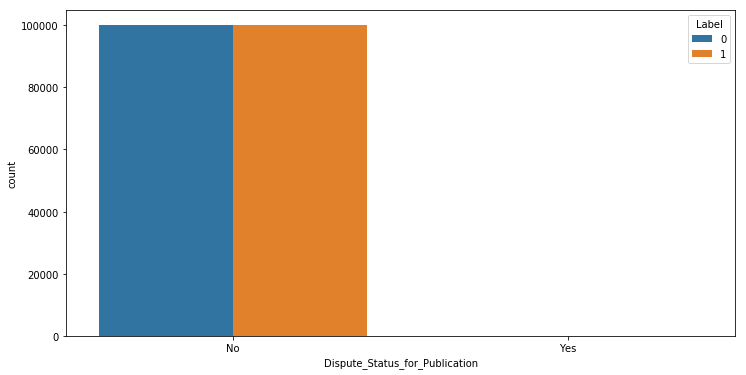

In [46]:
plt.figure(figsize  = (12,6))
_ = sns.countplot(x="Dispute_Status_for_Publication", data=df_final, hue='Label')

We will keep this column as it does not lead to information leakage. Both classes have 'Yes' and 'No'.

In [47]:
#Covered_or_Noncovered_Indicator_1
df_final.groupby(['Label', 'Covered_or_Noncovered_Indicator_1']).count()

Change_Type  Covered_Recipient_Type  \
Label Covered_or_Noncovered_Indicator_1                                        
0     Covered                                  92343                   92343   
      Non-Covered                               2648                    2648   
1     Covered                                  63205                   63205   
      Non-Covered                              23338                   23338   

                                         Physician_Profile_ID  \
Label Covered_or_Noncovered_Indicator_1                         
0     Covered                                           92077   
      Non-Covered                                        2626   
1     Covered                                            2778   
      Non-Covered                                         823   

                                         Recipient_Primary_Business_Street_Address_Line1  \
Label Covered_or_Noncovered_Indicator_1                                                    
0     Covered                                                                      92343   
      Non-Covered                                                                   2648   
1     Covered                                                                      63157   
      Non-Covered                                                                  23273   

                                         Recipient_City  Recipient_State  \
Label Covered_or_Noncovered_Indicator_1                                    
0     Covered                                     92343            92340   
      Non-Covered                                  2648             2648   
1     Covered                                     63157            63145   
      Non-Covered                                 23273            23272   

                                         Recipient_Zip_Code  \
Label Covered_or_Noncovered_Indicator_1                       
0     Covered                                         92340   
      Non-Covered                                      2648   
1     Covered                                         63145   
      Non-Covered                                     23272   

                                         Recipient_Country  \
Label Covered_or_Noncovered_Indicator_1                      
0     Covered                                        92343   
      Non-Covered                                     2648   
1     Covered                                        63157   
      Non-Covered                                    23273   

                                         Physician_Primary_Type  \
Label Covered_or_Noncovered_Indicator_1                           
0     Covered                                             92077   
      Non-Covered                                          2626   
1     Covered                                             62771   
      Non-Covered                                         23227   

                                         Physician_Specialty  \
Label Covered_or_Noncovered_Indicator_1                        
0     Covered                                          91991   
      Non-Covered                                       2603   
1     Covered                                          62763   
      Non-Covered                                      23103   

                                         Physician_License_State_code1  \
Label Covered_or_Noncovered_Indicator_1                                  
0     Covered                                                    92077   
      Non-Covered                                                 2626   
1     Covered                                                    62771   
      Non-Covered                                                23227   

                                         Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name  \
Label Covered_or_Noncovered_Indicator_1                                 

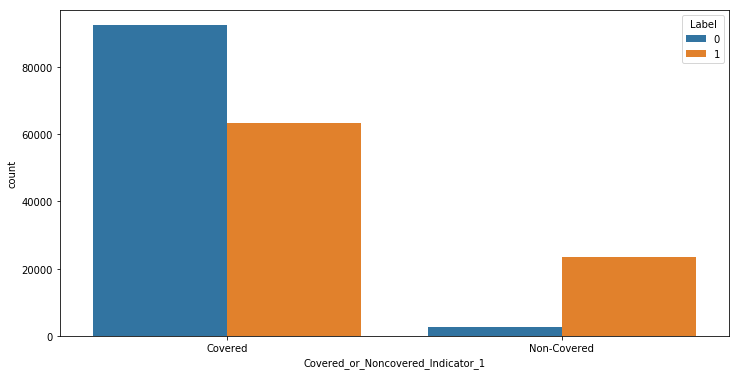

In [48]:
plt.figure(figsize  = (12,6))
_ = sns.countplot(x="Covered_or_Noncovered_Indicator_1", data=df_final, hue='Label')

We will keep this column as it does not lead to information leakage. Both classes have 'Covered' and 'Non-Covered'

In [49]:
#Related_Product_Indicator
df_final.groupby(['Label', 'Related_Product_Indicator']).count()

Change_Type  Covered_Recipient_Type  \
Label Related_Product_Indicator                                        
0     No                                5009                    5009   
      Yes                              94991                   94991   
1     No                               13457                   13457   
      Yes                              86543                   86543   

                                 Physician_Profile_ID  \
Label Related_Product_Indicator                         
0     No                                         4915   
      Yes                                       94703   
1     No                                          503   
      Yes                                        3601   

                                 Recipient_Primary_Business_Street_Address_Line1  \
Label Related_Product_Indicator                                                    
0     No                                                                    5009   
      Yes                                                                  94991   
1     No                                                                   13449   
      Yes                                                                  86430   

                                 Recipient_City  Recipient_State  \
Label Related_Product_Indicator                                    
0     No                                   5009             5009   
      Yes                                 94991            94988   
1     No                                  13449            13385   
      Yes                                 86430            86417   

                                 Recipient_Zip_Code  Recipient_Country  \
Label Related_Product_Indicator                                          
0     No                                       5009               5009   
      Yes                                     94988              94991   
1     No                                      13385              13449   
      Yes                                     86417              86430   

                                 Physician_Primary_Type  Physician_Specialty  \
Label Related_Product_Indicator                                                
0     No                                           4915                 4894   
      Yes                                         94703                94594   
1     No                                          13178                13172   
      Yes                                         85998                85866   

                                 Physician_License_State_code1  \
Label Related_Product_Indicator                                  
0     No                                                  4915   
      Yes                                                94703   
1     No                                                 13175   
      Yes                                                85998   

                                 Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name  \
Label Related_Product_Indicator                                                              
0     No                                                                      5009           
      Yes                                                                    94991           
1     No                                                                     13457           
      Yes                                                                    86543           

                                 Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID  \
Label Related_Product_Indicator                                                                
0     No                                                                      5009             
      Yes                                                                    94991             
1     No                                                               

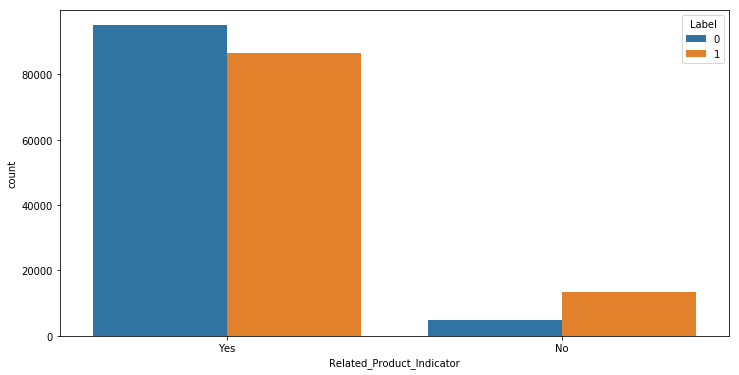

In [50]:
plt.figure(figsize  = (12,6))
_ = sns.countplot(x="Related_Product_Indicator", data=df_final, hue='Label')

We will keep this column as it does not lead to information leakage. Both classes have 'Yes' and 'No'

In [51]:
#Form_of_Payment_or_Transfer_of_Value
df_final.groupby(['Label', 'Form_of_Payment_or_Transfer_of_Value']).count()

Change_Type  \
Label Form_of_Payment_or_Transfer_of_Value                          
0     Any other ownership interest                              1   
      Cash or cash equivalent                               15882   
      Dividend, profit or other return on investment            4   
      In-kind items and services                            84113   
1     Cash or cash equivalent                               79129   
      In-kind items and services                            20871   

                                                      Covered_Recipient_Type  \
Label Form_of_Payment_or_Transfer_of_Value                                     
0     Any other ownership interest                                         1   
      Cash or cash equivalent                                          15882   
      Dividend, profit or other return on investment                       4   
      In-kind items and services                                       84113   
1     Cash or cash equivalent                                          79129   
      In-kind items and services                                       20871   

                                                      Physician_Profile_ID  \
Label Form_of_Payment_or_Transfer_of_Value                                   
0     Any other ownership interest                                       1   
      Cash or cash equivalent                                        15586   
      Dividend, profit or other return on investment                     4   
      In-kind items and services                                     84027   
1     Cash or cash equivalent                                         2812   
      In-kind items and services                                      1292   

                                                      Recipient_Primary_Business_Street_Address_Line1  \
Label Form_of_Payment_or_Transfer_of_Value                                                              
0     Any other ownership interest                                                                  1   
      Cash or cash equivalent                                                                   15882   
      Dividend, profit or other return on investment                                                4   
      In-kind items and services                                                                84113   
1     Cash or cash equivalent                                                                   79008   
      In-kind items and services                                                                20871   

                                                      Recipient_City  \
Label Form_of_Payment_or_Transfer_of_Value                             
0     Any other ownership interest                                 1   
      Cash or cash equivalent                                  15882   
      Dividend, profit or other return on investment               4   
      In-kind items and services                               84113   
1     Cash or cash equivalent                                  79008   
      In-kind items and services                               20871   

                                                      Recipient_State  \
Label Form_of_Payment_or_Transfer_of_Value                              
0     Any other ownership interest                                  1   
      Cash or cash equivalent                                   15882   
      Dividend, profit or other return on investment                4   
      In-kind items and services                                84110   
1     Cash or cash equivalent                                   78936   
      In-kind items and services                                20866   

                                                      Recipient_Zip_Code  \
Label Form_of_Payment_or_Transfer_of_Value                                 
0     Any other ownership interest                                     1   
    

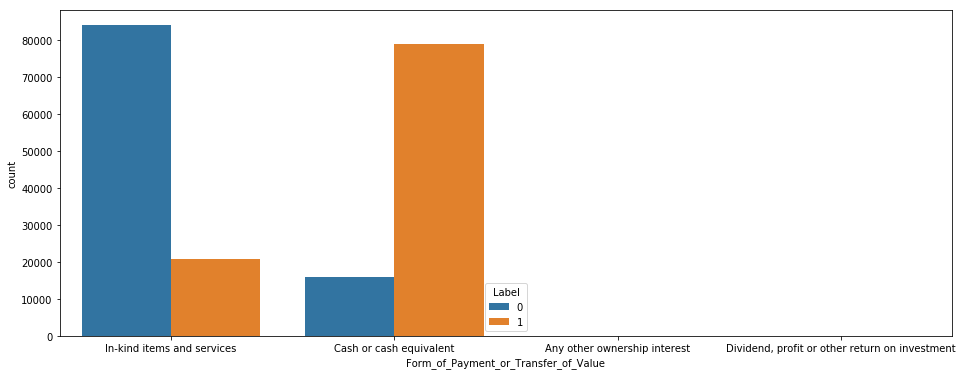

In [52]:
plt.figure(figsize  = (16,6))
_ = sns.countplot(x="Form_of_Payment_or_Transfer_of_Value", data=df_final, hue='Label')

From the above chart, it looks like 'Form_of_Payment_or_Transfer_of_Value' is very much correlated with the target label. As such, we will drop this feature completely.

In [53]:
df_final.drop(columns='Form_of_Payment_or_Transfer_of_Value', inplace=True)

In [54]:
#Change_Type
df_final.groupby(['Label', 'Change_Type']).count()

Covered_Recipient_Type  Physician_Profile_ID  \
Label Change_Type                                                 
0     CHANGED                        1904                  1899   
      NEW                            3059                  3048   
      UNCHANGED                     95037                 94671   
1     CHANGED                        5470                    86   
      NEW                             276                   123   
      UNCHANGED                     94254                  3895   

                   Recipient_Primary_Business_Street_Address_Line1  \
Label Change_Type                                                    
0     CHANGED                                                 1904   
      NEW                                                     3059   
      UNCHANGED                                              95037   
1     CHANGED                                                 5470   
      NEW                                                      276   
      UNCHANGED                                              94133   

                   Recipient_City  Recipient_State  Recipient_Zip_Code  \
Label Change_Type                                                        
0     CHANGED                1904             1904                1904   
      NEW                    3059             3059                3059   
      UNCHANGED             95037            95034               95034   
1     CHANGED                5470             5470                5470   
      NEW                     276              276                 276   
      UNCHANGED             94133            94056               94056   

                   Recipient_Country  Physician_Primary_Type  \
Label Change_Type                                              
0     CHANGED                   1904                    1899   
      NEW                       3059                    3048   
      UNCHANGED                95037                   94671   
1     CHANGED                   5470                    5463   
      NEW                        276                     274   
      UNCHANGED                94133                   93439   

                   Physician_Specialty  Physician_License_State_code1  \
Label Change_Type                                                       
0     CHANGED                     1899                           1899   
      NEW                         3048                           3048   
      UNCHANGED                  94541                          94671   
1     CHANGED                     5463                           5463   
      NEW                          274                            274   
      UNCHANGED                  93301                          93436   

                   Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name  \
Label Change_Type                                                              
0     CHANGED                                                   1904           
      NEW                                                       3059           
      UNCHANGED                                                95037           
1     CHANGED                                                   5470           
      NEW                                                        276           
      UNCHANGED                                                94254           

                   Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID  \
Label Change_Type                                                                
0     CHANGED                                                   1904             
      NEW                                                       3059             
      UNCHANGED                                                95037             
1     CHANGED                                                   5470             
      NEW                                                        276             
      UNCHANGED

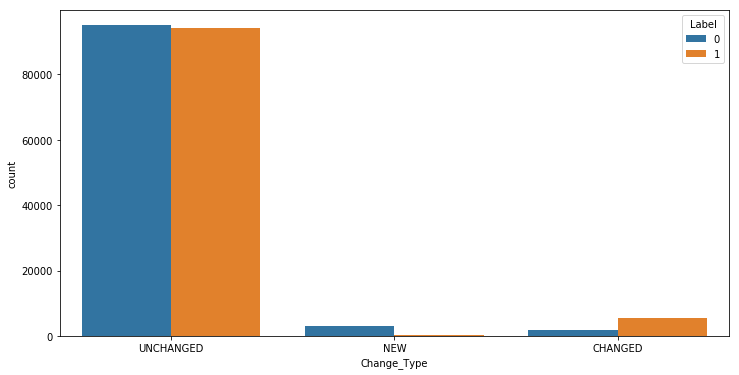

In [55]:
plt.figure(figsize  = (12,6))
_ = sns.countplot(x="Change_Type", data=df_final, hue='Label')

We will keep this column as it does not lead to information leakage. Both classes have same categories.

In [56]:
#Covered_Recipient_Type
df_final.groupby(['Label', 'Covered_Recipient_Type']).count()

Change_Type  Physician_Profile_ID  \
Label Covered_Recipient_Type                                                   
0     Covered Recipient Physician                99618                 99618   
      Covered Recipient Teaching Hospital          382                     0   
1     Covered Recipient Physician                 4104                  4104   
      Covered Recipient Teaching Hospital        15771                     0   
      Non-covered Recipient Entity               80004                     0   
      Non-covered Recipient Individual             121                     0   

                                           Recipient_Primary_Business_Street_Address_Line1  \
Label Covered_Recipient_Type                                                                 
0     Covered Recipient Physician                                                    99618   
      Covered Recipient Teaching Hospital                                              382   
1     Covered Recipient Physician                                                     4104   
      Covered Recipient Teaching Hospital                                            15771   
      Non-covered Recipient Entity                                                   80004   
      Non-covered Recipient Individual                                                   0   

                                           Recipient_City  Recipient_State  \
Label Covered_Recipient_Type                                                 
0     Covered Recipient Physician                   99618            99615   
      Covered Recipient Teaching Hospital             382              382   
1     Covered Recipient Physician                    4104             4104   
      Covered Recipient Teaching Hospital           15771            15771   
      Non-covered Recipient Entity                  80004            79927   
      Non-covered Recipient Individual                  0                0   

                                           Recipient_Zip_Code  \
Label Covered_Recipient_Type                                    
0     Covered Recipient Physician                       99615   
      Covered Recipient Teaching Hospital                 382   
1     Covered Recipient Physician                        4104   
      Covered Recipient Teaching Hospital               15771   
      Non-covered Recipient Entity                      79927   
      Non-covered Recipient Individual                      0   

                                           Recipient_Country  \
Label Covered_Recipient_Type                                   
0     Covered Recipient Physician                      99618   
      Covered Recipient Teaching Hospital                382   
1     Covered Recipient Physician                       4104   
      Covered Recipient Teaching Hospital              15771   
      Non-covered Recipient Entity                     80004   
      Non-covered Recipient Individual                     0   

                                           Physician_Primary_Type  \
Label Covered_Recipient_Type                                        
0     Covered Recipient Physician                           99618   
      Covered Recipient Teaching Hospital                       0   
1     Covered Recipient Physician                            4104   
      Covered Recipient Teaching Hospital                   14947   
      Non-covered Recipient Entity                          80004   
      Non-covered Recipient Individual                        121   

                                           Physician_Specialty  \
Label Covered_Recipient_Type                                     
0     Covered Recipient Physician                        99488   
      Covered Recipient Teaching Hospital                    0   
1     Covered Recipient Physician                         4102   
      Covered Recipient Teaching Hospital                14946   
      Non-covered Recipient Entity       

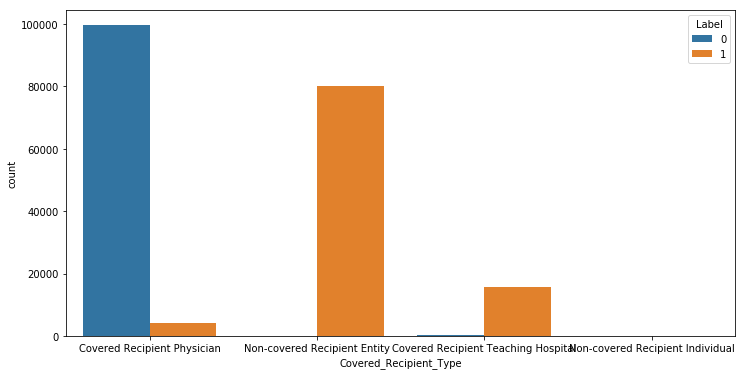

In [57]:
plt.figure(figsize  = (12,6))
_ = sns.countplot(x="Covered_Recipient_Type", data=df_final, hue='Label')

From the above chart, it looks like 'Covered_Recipient_Type' is very much correlated with the target label. As such, we will drop this feature completely.

In [58]:
df_final.drop(columns='Covered_Recipient_Type', inplace=True)

In [59]:
#Recipient_Country
df_final.groupby(['Label', 'Recipient_Country']).count()

Change_Type  Physician_Profile_ID  \
Label Recipient_Country                                                         
0     Australia                                       1                     1   
      Great Britain (Uk)                              1                     1   
      United States                               99997                 99615   
      United States Minor Outlying Islands            1                     1   
1     Belgium                                         1                     0   
      Canada                                         10                     0   
      Great Britain (Uk)                             64                     0   
      Japan                                           1                     0   
      United States                               99802                  4104   
      United States Minor Outlying Islands            1                     0   

                                            Recipient_Primary_Business_Street_Address_Line1  \
Label Recipient_Country                                                                       
0     Australia                                                                           1   
      Great Britain (Uk)                                                                  1   
      United States                                                                   99997   
      United States Minor Outlying Islands                                                1   
1     Belgium                                                                             1   
      Canada                                                                             10   
      Great Britain (Uk)                                                                 64   
      Japan                                                                               1   
      United States                                                                   99802   
      United States Minor Outlying Islands                                                1   

                                            Recipient_City  Recipient_State  \
Label Recipient_Country                                                       
0     Australia                                          1                0   
      Great Britain (Uk)                                 1                0   
      United States                                  99997            99997   
      United States Minor Outlying Islands               1                0   
1     Belgium                                            1                0   
      Canada                                            10                0   
      Great Britain (Uk)                                64                0   
      Japan                                              1                0   
      United States                                  99802            99802   
      United States Minor Outlying Islands               1                0   

                                            Recipient_Zip_Code  \
Label Recipient_Country                                          
0     Australia                                              0   
      Great Britain (Uk)                                     0   
      United States                                      99997   
      United States Minor Outlying Islands                   0   
1     Belgium                                                0   
      Canada                                                 0   
      Great Britain (Uk)                                     0   
      Japan                                                  0   
      United States                                      99802   
      United States Minor Outlying Islands                   0   

                                            Physician_Primary_Type  \
Label Recipient_Country                                              
0     Australia                                 

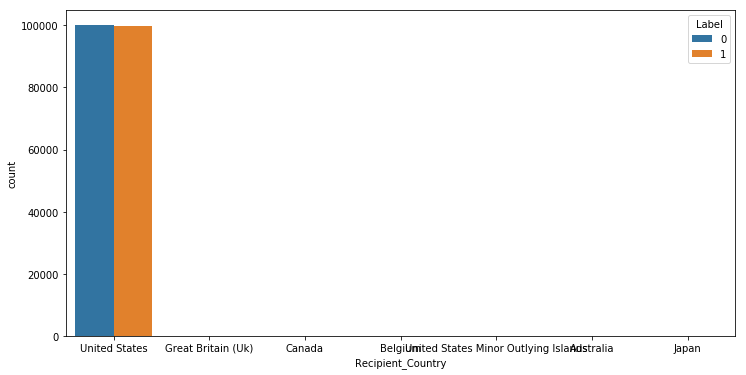

In [60]:
plt.figure(figsize  = (12,6))
_ = sns.countplot(x="Recipient_Country", data=df_final, hue='Label')

From the above, we can see that most of the data has Recipient_Country as United States. As such, there is very little variance. In order to avoid data leakage, we will remove this feature all together.

In [61]:
#Dropping Recipient_Country Column
df_final.drop(columns='Recipient_Country', inplace=True)

In [62]:
#Physician_Primary_Type
df_final.groupby(['Label', 'Physician_Primary_Type']).count()

Change_Type  Physician_Profile_ID  \
Label Physician_Primary_Type                                            
0     Chiropractor                           41                    41   
      Doctor of Dentistry                  3110                  3110   
      Doctor of Optometry                  2200                  2200   
      Doctor of Osteopathy                 8535                  8535   
      Doctor of Podiatric Medicine          916                   916   
      Medical Doctor                      84816                 84816   
1     Chiropractor                            1                     1   
      Doctor of Dentistry                    98                    65   
      Doctor of Optometry                   459                    69   
      Doctor of Osteopathy                 3977                   145   
      Doctor of Podiatric Medicine          219                     8   
      Medical Doctor                      94422                  3816   

                                    Recipient_Primary_Business_Street_Address_Line1  \
Label Physician_Primary_Type                                                          
0     Chiropractor                                                               41   
      Doctor of Dentistry                                                      3110   
      Doctor of Optometry                                                      2200   
      Doctor of Osteopathy                                                     8535   
      Doctor of Podiatric Medicine                                              916   
      Medical Doctor                                                          84816   
1     Chiropractor                                                                1   
      Doctor of Dentistry                                                        98   
      Doctor of Optometry                                                       459   
      Doctor of Osteopathy                                                     3975   
      Doctor of Podiatric Medicine                                              219   
      Medical Doctor                                                          94303   

                                    Recipient_City  Recipient_State  \
Label Physician_Primary_Type                                          
0     Chiropractor                              41               41   
      Doctor of Dentistry                     3110             3110   
      Doctor of Optometry                     2200             2200   
      Doctor of Osteopathy                    8535             8535   
      Doctor of Podiatric Medicine             916              916   
      Medical Doctor                         84816            84813   
1     Chiropractor                               1                1   
      Doctor of Dentistry                       98               98   
      Doctor of Optometry                      459              459   
      Doctor of Osteopathy                    3975             3974   
      Doctor of Podiatric Medicine             219              219   
      Medical Doctor                         94303            94227   

                                    Recipient_Zip_Code  Physician_Specialty  \
Label Physician_Primary_Type                                                  
0     Chiropractor                                  41                   41   
      Doctor of Dentistry                         3110                 3082   
      Doctor of Optometry                         2200                 2200   
      Doctor of Osteopathy                        8535                 8531   
      Doctor of Podiatric Medicine                 916                  914   
      Medical Doctor                             84813                84720   
1     Chiropractor                                   1                    1   
      Doctor of Dentistry                           98                   98   
      Doc

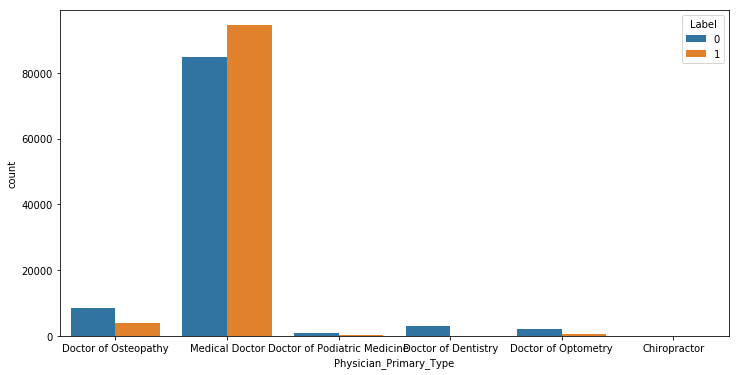

In [63]:
plt.figure(figsize  = (12,6))
_ = sns.countplot(x="Physician_Primary_Type", data=df_final, hue='Label')
#Remove this feature due to information leakage

From the above we can see that the Chiropractor Physician_Primary_Type is specific to label 0, hence to avoid information leakage we will remove rows where Physician_Primary_Type = Chiropractor

In [64]:
df_final = df_final[(df_final.Physician_Primary_Type != 'Chiropractor')]

In [65]:
#Change_Type
df_final.groupby(['Label', 'Change_Type']).count()

Physician_Profile_ID  \
Label Change_Type                         
0     CHANGED                      1899   
      NEW                          3048   
      UNCHANGED                   94630   
1     CHANGED                        86   
      NEW                           123   
      UNCHANGED                    3894   

                   Recipient_Primary_Business_Street_Address_Line1  \
Label Change_Type                                                    
0     CHANGED                                                 1904   
      NEW                                                     3059   
      UNCHANGED                                              94996   
1     CHANGED                                                 5470   
      NEW                                                      276   
      UNCHANGED                                              94132   

                   Recipient_City  Recipient_State  Recipient_Zip_Code  \
Label Change_Type                                                        
0     CHANGED                1904             1904                1904   
      NEW                    3059             3059                3059   
      UNCHANGED             94996            94993               94993   
1     CHANGED                5470             5470                5470   
      NEW                     276              276                 276   
      UNCHANGED             94132            94055               94055   

                   Physician_Primary_Type  Physician_Specialty  \
Label Change_Type                                                
0     CHANGED                        1899                 1899   
      NEW                            3048                 3048   
      UNCHANGED                     94630                94500   
1     CHANGED                        5463                 5463   
      NEW                             274                  274   
      UNCHANGED                     93438                93300   

                   Physician_License_State_code1  \
Label Change_Type                                  
0     CHANGED                               1899   
      NEW                                   3048   
      UNCHANGED                            94630   
1     CHANGED                               5463   
      NEW                                    274   
      UNCHANGED                            93435   

                   Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name  \
Label Change_Type                                                              
0     CHANGED                                                   1904           
      NEW                                                       3059           
      UNCHANGED                                                94996           
1     CHANGED                                                   5470           
      NEW                                                        276           
      UNCHANGED                                                94253           

                   Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID  \
Label Change_Type                                                                
0     CHANGED                                                   1904             
      NEW                                                       3059             
      UNCHANGED                                                94996             
1     CHANGED                                                   5470             
      NEW                                                        276             
      UNCHANGED                                                94253             

                   Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name  \
Label Change_Type                                                                  
0     CHANGED                                                   1904               
      NEW               

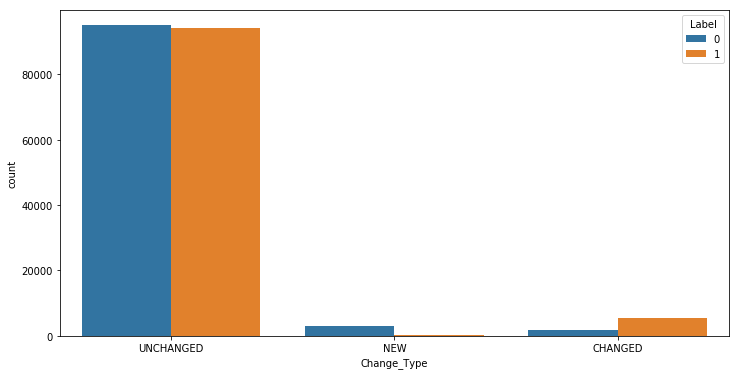

In [66]:
plt.figure(figsize  = (12,6))
_ = sns.countplot(x="Change_Type", data=df_final, hue='Label')

We will keep this column as it does not lead to information leakage. Both classes have same categories.

In [67]:
#Recipient_State
df_final.groupby(['Label', 'Recipient_State']).count()

Change_Type  Physician_Profile_ID  \
Label Recipient_State                                      
0     AE                         3                     3   
      AK                       101                   101   
      AL                      1941                  1932   
      AP                         2                     2   
      AR                      1014                  1012   
      AZ                      2153                  2147   
      CA                     10144                 10098   
      CO                      1173                  1170   
      CT                      1509                  1502   
      DC                       359                   356   
      DE                       369                   369   
      FL                      7725                  7704   
      GA                      3146                  3138   
      HI                       442                   440   
      IA                       599                   591   
      ID                       313                   308   
      IL                      3744                  3726   
      IN                      2261                  2256   
      KS                       912                   908   
      KY                      1637                  1636   
      LA                      1938                  1933   
      MA                      1490                  1475   
      MD                      2134                  2131   
      ME                       185                   185   
      MI                      3192                  3174   
      MN                       442                   436   
      MO                      2285                  2277   
      MS                      1061                  1059   
      MT                       127                   125   
      NC                      3274                  3268   
...                            ...                   ...   
1     MI                      2823                    64   
      MN                      1514                    63   
      MO                      2137                    93   
      MS                       359                    11   
      MT                       217                     1   
      NC                      5436                   156   
      ND                       242                     1   
      NE                       621                    27   
      NH                       284                    15   
      NJ                      2196                   104   
      NM                       429                    12   
      NV                       759                    31   
      NY                      5387                   251   
      OH                      3950                   192   
      OK                       793                    25   
      OR                      1145                    48   
      PA                      3796                   143   
      PR                       555                    58   
      RI                       268                     8   
      SC                      1784                    69   
      SD                       301                    12   
      TN                      2319                    91   
      TX                      9439                   341   
      UT                      1172                    37   
      VA                      2262                    83   
      VT                       151                    12   
      WA                      2257                    70   
      WI                      1453                    38   
      WV                       226                    13   
      WY                        28                     0   

                       Recipient_Primary_Business_Street_Address_Line1  \
Label Recipient_State                                                    
0     AE                                                             3   
      AK            

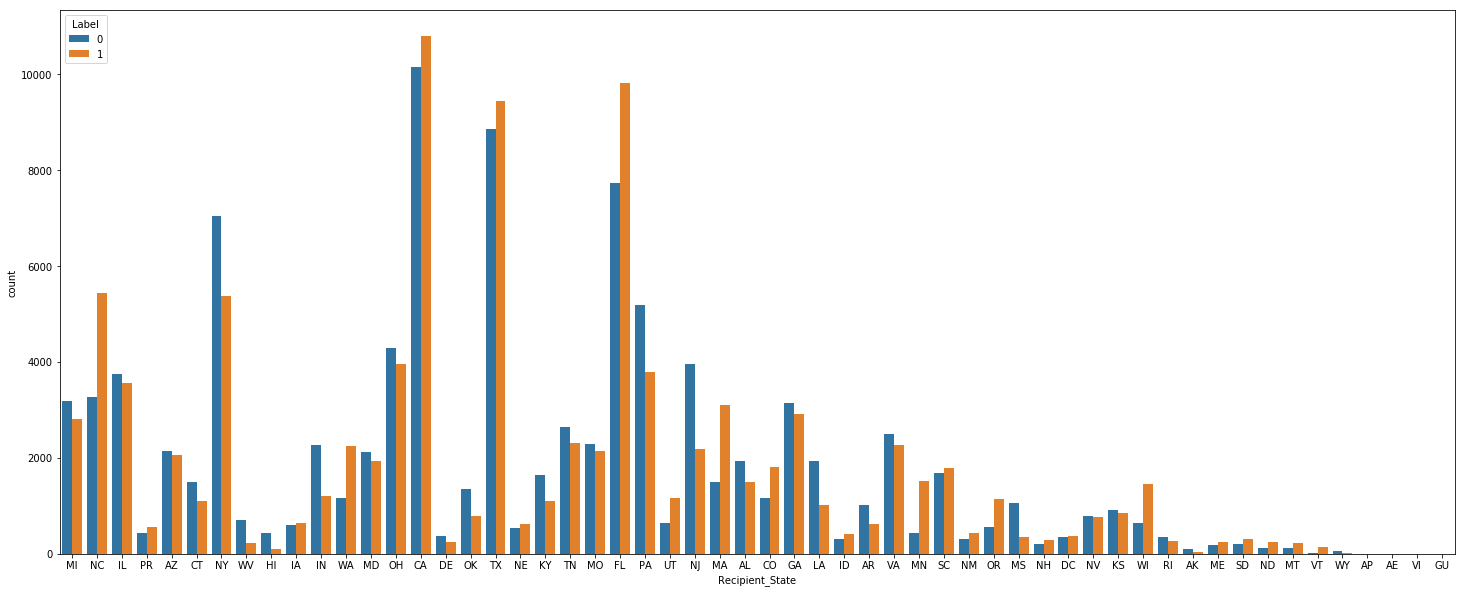

In [68]:
plt.figure(figsize  = (25,10))
_ = sns.countplot(x="Recipient_State", data=df_final, hue='Label')

As we can see from the above chart, both classes have presence in each of the states. As such, we will preserve this feature and will not eliminate any rows.

In [69]:
#Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country
df_final.groupby(['Label', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country']).count()

Change_Type  \
Label Applicable_Manufacturer_or_Applicable_GPO_Makin...                
0     Australia                                                     1   
      Barbados                                                     25   
      Belgium                                                       6   
      Canada                                                      104   
      China                                                         1   
      Denmark                                                      34   
      France                                                        3   
      Germany                                                      36   
      Great Britain (Uk)                                           26   
      Hong Kong                                                     1   
      Iceland                                                       1   
      Ireland                                                     586   
      Israel                                                        1   
      Italy                                                         1   
      Japan                                                        14   
      Korea (Republic of)                                           1   
      Mexico                                                        2   
      Netherlands                                                   2   
      South Africa                                                  1   
      Sweden                                                       11   
      Switzerland                                                  64   
      United States                                             99038   
1     Australia                                                     1   
      Austria                                                     540   
      Barbados                                                     16   
      Belgium                                                      29   
      Canada                                                      124   
      Denmark                                                    3681   
      France                                                      219   
      Germany                                                    3032   
      Great Britain (Uk)                                          817   
      Ireland                                                     135   
      Israel                                                        8   
      Japan                                                       100   
      Netherlands                                                1343   
      New Zealand                                                   2   
      Norway                                                       17   
      Spain                                                         1   
      Sweden                                                       35   
      Switzerland                                                 355   
      United States                                             89544   

                                                          Physician_Profile_ID  \
Label Applicable_Manufacturer_or_Applicable_GPO_Makin...                         
0     Australia                                                              1   
      Barbados                                                              25   
      Belgium                                                                6   
      Canada                                                               104   
      China                                                                  1   
      Denmark                                                               34   
      France                                                                 3   
      Germany                                                               36   
      Great Britain (Uk)                                                    26   
      Hong Kong 

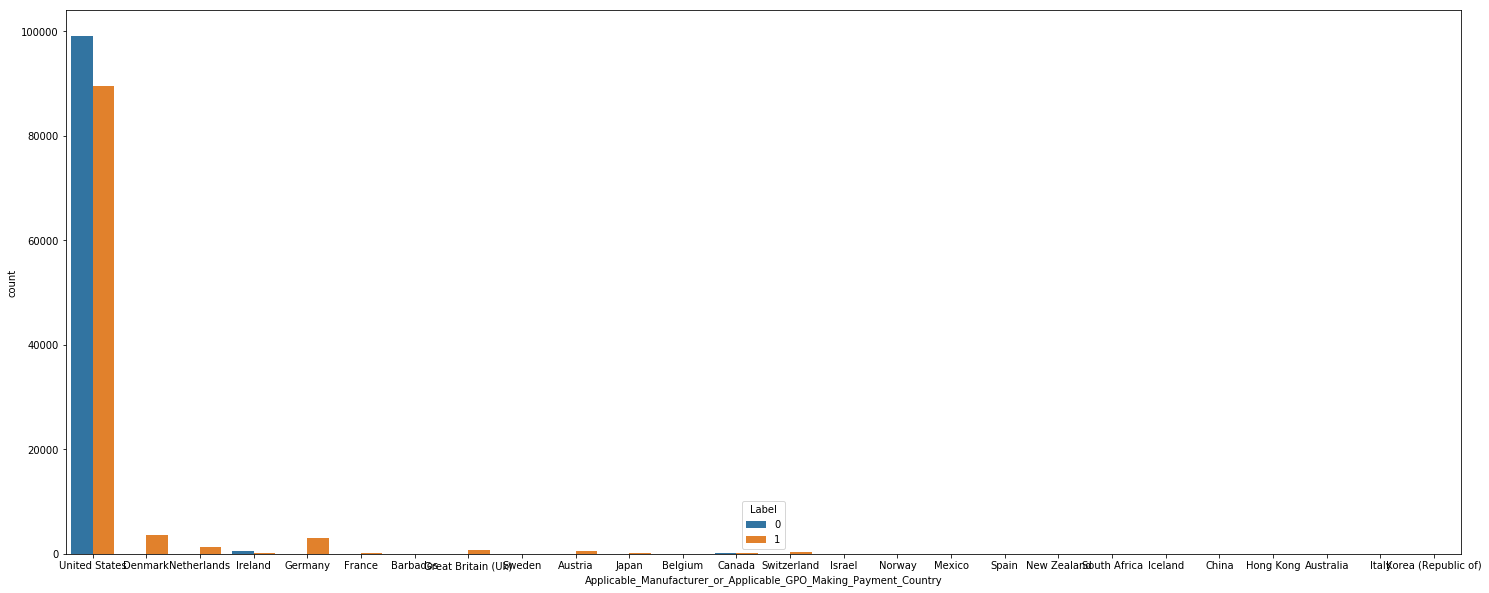

In [70]:
plt.figure(figsize  = (25,10))
_ = sns.countplot(x="Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country", data=df_final, hue='Label')

From the above table and chart, it is difficult to see the difference in category. For this, we will adopt a different approach where we will calculate the set difference to find out the categories that are missing in either of the classes.

In [71]:
#Countries not in Class 0
a = list(set(df_final[df_final.Label == 1].Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country) - set(df_final[df_final.Label == 0].Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country))
a

['Austria', 'Spain', 'New Zealand', 'Norway']

In [72]:
#Countries not in Class 1
b = list(set(df_final[df_final.Label == 0].Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country)-set(df_final[df_final.Label == 1].Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country))
b

['South Africa',
 'China',
 'Italy',
 'Mexico',
 'Hong Kong',
 'Korea (Republic of)',
 'Iceland']

In [73]:
#Removing rows with the above countries
df_final = df_final.loc[~df_final.Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country.isin(a+b), :]

In [74]:
#Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State
df_final.groupby(['Label', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State']).count()

Change_Type  \
Label Applicable_Manufacturer_or_Applicable_GPO_Makin...                
0     AL                                                          318   
      AR                                                            1   
      AZ                                                          267   
      CA                                                        10216   
      CO                                                          268   
      CT                                                         3474   
      DC                                                          118   
      DE                                                         4574   
      FL                                                         1000   
      GA                                                         1408   
      IA                                                            1   
      IL                                                         8752   
      IN                                                         3996   
      KS                                                            3   
      KY                                                          112   
      LA                                                            4   
      MA                                                         7841   
      MD                                                         1540   
      MI                                                          911   
      MN                                                         3381   
      MO                                                          763   
      NC                                                         4213   
      NH                                                           29   
      NJ                                                        30371   
      NM                                                           11   
      NV                                                           73   
      NY                                                         6682   
      OH                                                          270   
      OK                                                           16   
      OR                                                          310   
...                                                               ...   
1     CT                                                          152   
      DC                                                           61   
      DE                                                         7831   
      FL                                                          204   
      GA                                                          130   
      IL                                                         6207   
      IN                                                         1818   
      MA                                                        12881   
      MD                                                          159   
      MI                                                          222   
      MN                                                         1977   
      MO                                                          130   
      NC                                                         2681   
      NH                                                           36   
      NJ                                                        27990   
      NV                                                          116   
      NY                                                        10495   
      OH                                                          105   
      OR                                                         3039   
      PA                                                         2122   
      PR                                                           13   
      RI                                                           63   
      TN                                   

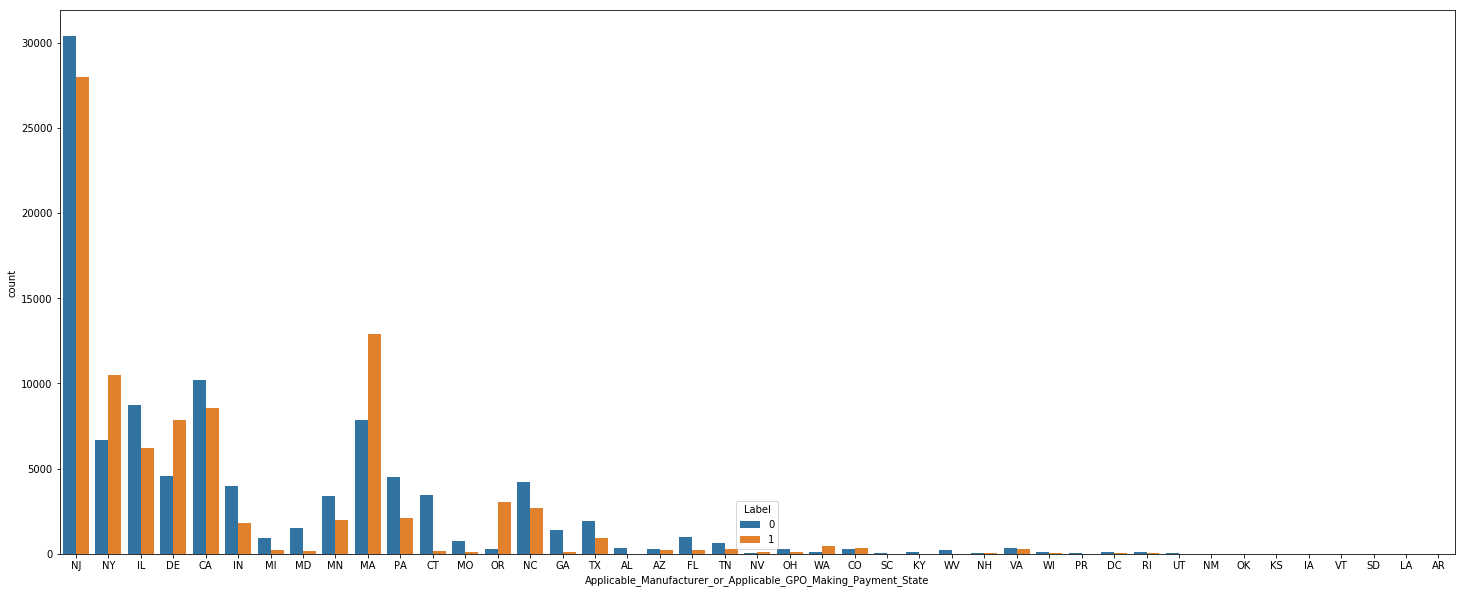

In [75]:
plt.figure(figsize  = (25,10))
_ = sns.countplot(x="Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State", data=df_final, hue='Label')

Similar to the previous feature, it is difficult to see the difference in category. For this, we will adopt a similar approach where we will calculate the set difference to find out the categories that are missing in either of the classes.

In [76]:
#Countries not in Class 0
a = list(set(df_final[df_final.Label == 1].Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State) - set(df_final[df_final.Label == 0].Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State))
a

['VT']

In [77]:
#Countries not in Class 1
b = list(set(df_final[df_final.Label == 0].Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State)-set(df_final[df_final.Label == 1].Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State))
b

['KY', 'AR', 'IA', 'SD', 'NM', 'KS', 'LA', 'OK', 'AL', 'SC']

In [78]:
#Removing rows with the above countries
df_final = df_final.loc[~df_final.Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State.isin(a+b), :]

In [79]:
#Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1
df_final.groupby(['Label', 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1']).count()

Change_Type  \
Label Indicate_Drug_or_Biological_or_Device_or_Medica...                
0     Biological                                                 9820   
      Device                                                    19255   
      Drug                                                      63185   
      Medical Supply                                               84   
1     Biological                                                14362   
      Device                                                    11105   
      Drug                                                      44553   
      Medical Supply                                               13   

                                                          Physician_Profile_ID  \
Label Indicate_Drug_or_Biological_or_Device_or_Medica...                         
0     Biological                                                          9797   
      Device                                                             19072   
      Drug                                                               63119   
      Medical Supply                                                        82   
1     Biological                                                           436   
      Device                                                               877   
      Drug                                                                1717   
      Medical Supply                                                         5   

                                                          Recipient_Primary_Business_Street_Address_Line1  \
Label Indicate_Drug_or_Biological_or_Device_or_Medica...                                                    
0     Biological                                                                                     9820   
      Device                                                                                        19255   
      Drug                                                                                          63185   
      Medical Supply                                                                                   84   
1     Biological                                                                                    14360   
      Device                                                                                        11096   
      Drug                                                                                          44516   
      Medical Supply                                                                                   13   

                                                          Recipient_City  \
Label Indicate_Drug_or_Biological_or_Device_or_Medica...                   
0     Biological                                                    9820   
      Device                                                       19255   
      Drug                                                         63185   
      Medical Supply                                                  84   
1     Biological                                                   14360   
      Device                                                       11096   
      Drug                                                         44516   
      Medical Supply                                                  13   

                                                          Recipient_State  \
Label Indicate_Drug_or_Biological_or_Device_or_Medica...                    
0     Biological                                                     9820   
      Device                                                        19255   
      Drug                                                          63182   
      Medical Supply                                                   84   
1     Biological                                                    14356   
      Device                                                        11094   
      Drug                            

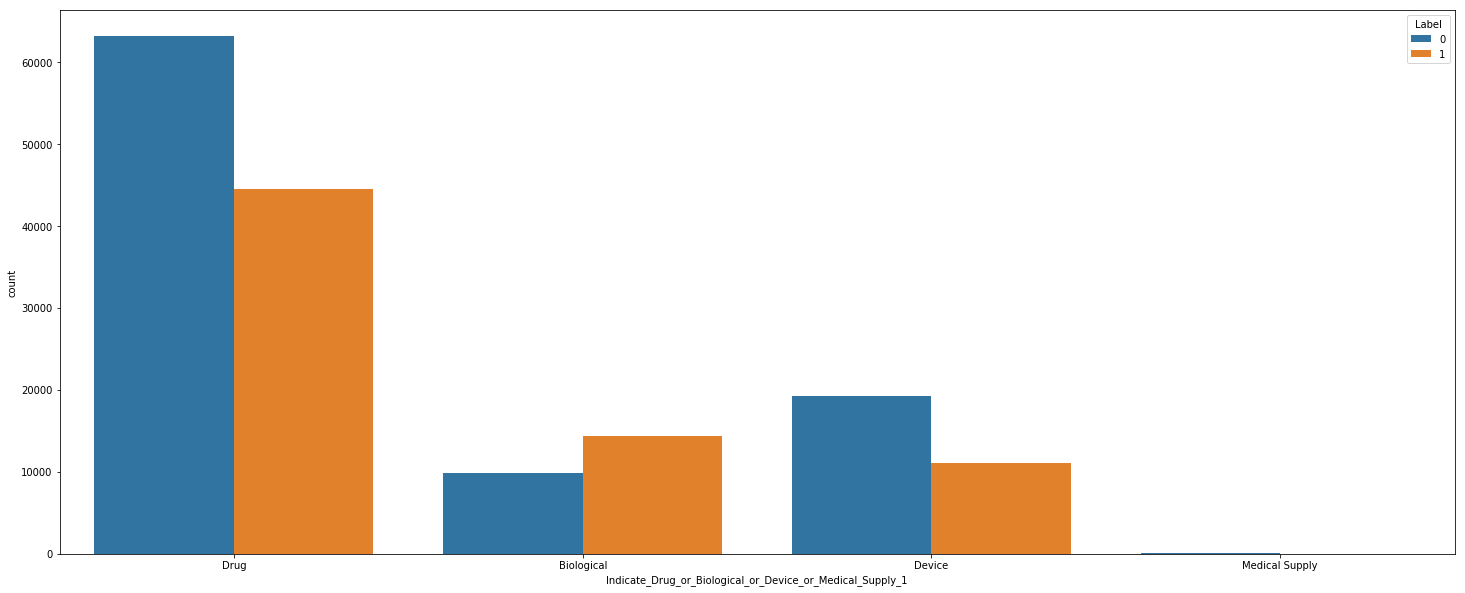

In [80]:
plt.figure(figsize  = (25,10))
_ = sns.countplot(x="Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1", data=df_final, hue='Label')

As we can see from the above chart, both classes have presence in each of the states. As such, we will preserve this feature and will not eliminate any rows.

In [81]:
df_final.drop(columns=['Associated_Drug_or_Biological_NDC_1', 'Physician_Profile_ID', 'Recipient_Primary_Business_Street_Address_Line1', 
                       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID'], inplace=True)

In [82]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198880 entries, 0 to 199999
Data columns (total 20 columns):
Change_Type                                                         198880 non-null object
Recipient_City                                                      198759 non-null object
Recipient_State                                                     198679 non-null object
Recipient_Zip_Code                                                  198679 non-null object
Physician_Primary_Type                                              197679 non-null object
Physician_Specialty                                                 197411 non-null object
Physician_License_State_code1                                       197676 non-null object
Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name           198880 non-null object
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name       198880 non-null object
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State      18

In [83]:
df_final.head()

,Change_Type,Recipient_City,Recipient_State,Recipient_Zip_Code,Physician_Primary_Type,Physician_Specialty,Physician_License_State_code1,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country,Related_Product_Indicator,Covered_or_Noncovered_Indicator_1,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1,Product_Category_or_Therapeutic_Area_1,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1,Total_Amount_of_Payment_USDollars,Date_of_Payment,Dispute_Status_for_Publication,Label
0,UNCHANGED,MIDLAND,MI,48642-4600,Doctor of Osteopathy,Allopathic & Osteopathic Physicians|General Pr...,MI,ARALEZ PHARMACEUTICALS US INC.,Aralez Pharmaceuticals US Inc.,NJ,United States,Yes,Covered,Drug,CARDIOVASCULAR,ZONTIVITY,18.44,11/21/2017,No,0
1,UNCHANGED,CARY,NC,27518,Doctor of Osteopathy,Allopathic & Osteopathic Physicians|Family Med...,NC,Novo Nordisk Inc,Novo Nordisk AS,NaN,Denmark,Yes,Covered,Drug,Diabetes,Ozempic,500.00,07/25/2017,No,1
2,UNCHANGED,Elgin,IL,60123,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,IL,Bristol-Myers Squibb Company,"E.R. Squibb & Sons, L.L.C.",NJ,United States,Yes,Covered,Biological,Oncology,OPDIVO,16.04,06/16/2017,No,0
3,UNCHANGED,PONCE,PR,00717,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,PR,Pfizer Inc.,Pfizer Inc.,NY,United States,Yes,Non-Covered,NaN,NaN,NaN,694.50,02/08/2017,No,1
4,UNCHANGED,TEMPE,AZ,85282-1892,Doctor of Osteopathy,Allopathic & Osteopathic Physicians|Family Med...,AZ,"Regeneron Pharmaceuticals, Inc.","Regeneron Pharmaceuticals, Inc.",NY,United States,Yes,Non-Covered,NaN,NaN,NaN,16783.00,01/06/2017,No,1


In [84]:
#Saving the final dataset
df_final.to_csv('data/df_final.csv')

# Task 2

In the previous part we did intensive identification of the features to prevent information leak. In this section we will build a simple minimum viable model based on the intial features that were selected in previous part.

The final dataset of 200,000 rows that was created will be used here.

In [85]:
#Reading the Dataset created in the previous task
data = pd.read_csv('data/df_final.csv')

Since, building model on 200,000 is computationally expensive, we will further subsample the dataset to have 20,000 rows.

In [86]:
#Creating a sample with only 20% of all the values in the original data.
df_compressed = data.sample(frac= 0.1, random_state=42).reset_index(drop=True)
df_compressed.drop(columns='Unnamed: 0', inplace=True)
df_compressed.groupby(df_compressed['Label']).count()

,Change_Type,Recipient_City,Recipient_State,Recipient_Zip_Code,Physician_Primary_Type,Physician_Specialty,Physician_License_State_code1,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country,Related_Product_Indicator,Covered_or_Noncovered_Indicator_1,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1,Product_Category_or_Therapeutic_Area_1,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1,Total_Amount_of_Payment_USDollars,Date_of_Payment,Dispute_Status_for_Publication
Label,,,,,,,,,,,,,,,,,,,
0,9963,9963,9963,9963,9916,9899,9916,9963,9963,9862,9963,9963,9489,9278,9244,9254,9963,9963,9963
1,9925,9911,9899,9899,9854,9844,9854,9925,9925,9005,9925,9925,8596,7006,6526,6962,9925,9925,9925


As you can see from the above, we have created a balanced dataset through undersampling. Both classes - Class 1 and Class 2 have almost same number of rows in the dataset.

Now, we will preprocess the Date_of_time variable. Since the data is from 2017, we will remove the year and the day and just keep the month, which will be treated as a categorical variable.

In [87]:
#Converting the Date_of_Payment to datetime
df_compressed.Date_of_Payment = pd.to_datetime(df_compressed.Date_of_Payment)
#Adding the Month of Payment
df_compressed['Payment_Month'] = df_compressed.Date_of_Payment.dt.month
#Dropping Date_of_Payment (Year is 2017)
df_compressed.drop(columns='Date_of_Payment', inplace=True)

In [88]:
df_compressed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19888 entries, 0 to 19887
Data columns (total 20 columns):
Change_Type                                                         19888 non-null object
Recipient_City                                                      19874 non-null object
Recipient_State                                                     19862 non-null object
Recipient_Zip_Code                                                  19862 non-null object
Physician_Primary_Type                                              19770 non-null object
Physician_Specialty                                                 19743 non-null object
Physician_License_State_code1                                       19770 non-null object
Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name           19888 non-null object
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name       19888 non-null object
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State      18867 non-nul

In [89]:
#Converting Payment_Month to object as it is a categorical variable
df_compressed['Payment_Month'] = df_compressed['Payment_Month'].astype(object)

In [90]:
X=df_compressed.drop(columns=['Label'])
y=df_compressed.Label

We will define the categorical and continuous features. In our dataset, there is only one continuous feature - Total_Amount_of_Payment_USDollars. Rest all the features are categorical.

In [91]:
#Categorical Features
cat_features = list(X.columns)
cat_features.remove('Total_Amount_of_Payment_USDollars')

#Continuous Features
cont_features = ['Total_Amount_of_Payment_USDollars']

The NaN values for the categorical features will be encoded into a new category 'NA'. There are no null values for the continuous feature.

In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19888 entries, 0 to 19887
Data columns (total 19 columns):
Change_Type                                                         19888 non-null object
Recipient_City                                                      19874 non-null object
Recipient_State                                                     19862 non-null object
Recipient_Zip_Code                                                  19862 non-null object
Physician_Primary_Type                                              19770 non-null object
Physician_Specialty                                                 19743 non-null object
Physician_License_State_code1                                       19770 non-null object
Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name           19888 non-null object
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name       19888 non-null object
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State      18867 non-nul

In [93]:
# Splitting the data in training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Proceeding to building the baseline model - Logistic Regression. 

- We will use limited featured while building the model. As such only use a subset of columns which includes randomly selected 8 features. Columns that would be included are 'Change_Type', 'Recipient_Zip_Code', 'Physician_Specialty', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country', 'Related_Product_Indicator', 'Total_Amount_of_Payment_USDollars', 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1', 'Covered_or_Noncovered_Indicator_1'

- Note that above features are chosen on a random basis as this is a baseline model.

- In terms of preprocessing, a new category would be created to encode the null values in each of the column.

- Since this is the baseline model, we will use the default parameters specified in scikit learn for Logistic Regression.

The NaN values for the categorical features will be encoded into a new category 'NA'. There are no null values for the continuous feature.

In [101]:
# Replacing the NaN values to NA which is a new category created
def null_categories(Xa):
    Xa = Xa[['Change_Type', 'Recipient_Zip_Code', 'Physician_Specialty', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country', 'Related_Product_Indicator', 
             'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1', 'Covered_or_Noncovered_Indicator_1']]
    return Xa.replace({np.nan:'NA'})

In [102]:
# Build a pipeline for dealing with categorical variables and continuous variables.
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import make_pipeline

preprocess_baseline_nan = ColumnTransformer( 
    [('func', FunctionTransformer(func=null_categories, validate=False), cat_features)], remainder='passthrough')

preprocess_baseline_ohe = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown='ignore'), 
                                            np.arange(0,8))], remainder='passthrough')

In [103]:
#Model Building - Baseline Model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

pipeline_baseline = make_pipeline(preprocess_baseline_nan, preprocess_baseline_ohe, LogisticRegression())
logreg_scores = cross_val_score(pipeline_baseline, X_train, y_train, cv=5)
print('Logistic Regression - Accuracy (Baseline Model): ', np.mean(logreg_scores))

Logistic Regression - Accuracy (Baseline Model):  0.8429211620271678


In [104]:
precision_baseline =  cross_val_score(pipeline_baseline, X_train, y_train, cv=5, scoring='precision')
recall_baseline = cross_val_score(pipeline_baseline, X_train, y_train, cv=5, scoring='recall')
print('Logistic Regression - Precision (Baseline Model): ', np.mean(precision_baseline))
print('Logistic Regression - Recall (Baseline Model): ', np.mean(recall_baseline))

Logistic Regression - Precision (Baseline Model):  0.873843083096775
Logistic Regression - Recall (Baseline Model):  0.8009128772287095


As we can see from the above analysis, a baseline linear model that selects 8 random features achieves an accuracy of 86%. In the subsequent parts, we will try to beat this accuracy using better feature selection mechanisms.

# Task 3

In this section, we will create derived features, do more in-depth processing and data cleaning. This will particularly revolve around encoding the categorical variables in different ways. Using this we will check whether this improves the model.

We will follow the following approaches to preprocessing:

- All null values will be encoding in a different category, similar to Task 2.
- Target Encoding will be used to encode categorical features.
- Standardize the continuous feature 'Total_Amount_of_Payment_USDollars'.
- All the features would be used in model building.

In [105]:
X.nunique().sort_values()

Covered_or_Noncovered_Indicator_1                                      2
Related_Product_Indicator                                              2
Dispute_Status_for_Publication                                         2
Change_Type                                                            3
Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1              4
Physician_Primary_Type                                                 5
Payment_Month                                                         12
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country      14
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State        32
Recipient_State                                                       52
Physician_License_State_code1                                         52
Physician_Specialty                                                  190
Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name            506
Applicable_Manufacturer_or_Applicable_GPO_Making_Pa

In this section, we will drop the obvious correlation features:
- Recipient_City & Recipient_Zip_Code: Correlated with Recipient_State
- Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country: Correlated with Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State

In [106]:
#Dropping redundant features which are obviously correlated
X.drop(columns=['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
               'Recipient_Zip_Code', 'Recipient_City'], inplace=True)

#Finding the Categorical Features
cat_features = list(X.columns)
cat_features.remove('Total_Amount_of_Payment_USDollars')

In [107]:
#Defining a function to replace the null values with NA
def null_categories_q3(Xa):
    return Xa.replace({np.nan:'NA'})

/Users/Sarang/anaconda3/envs/coms007/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.


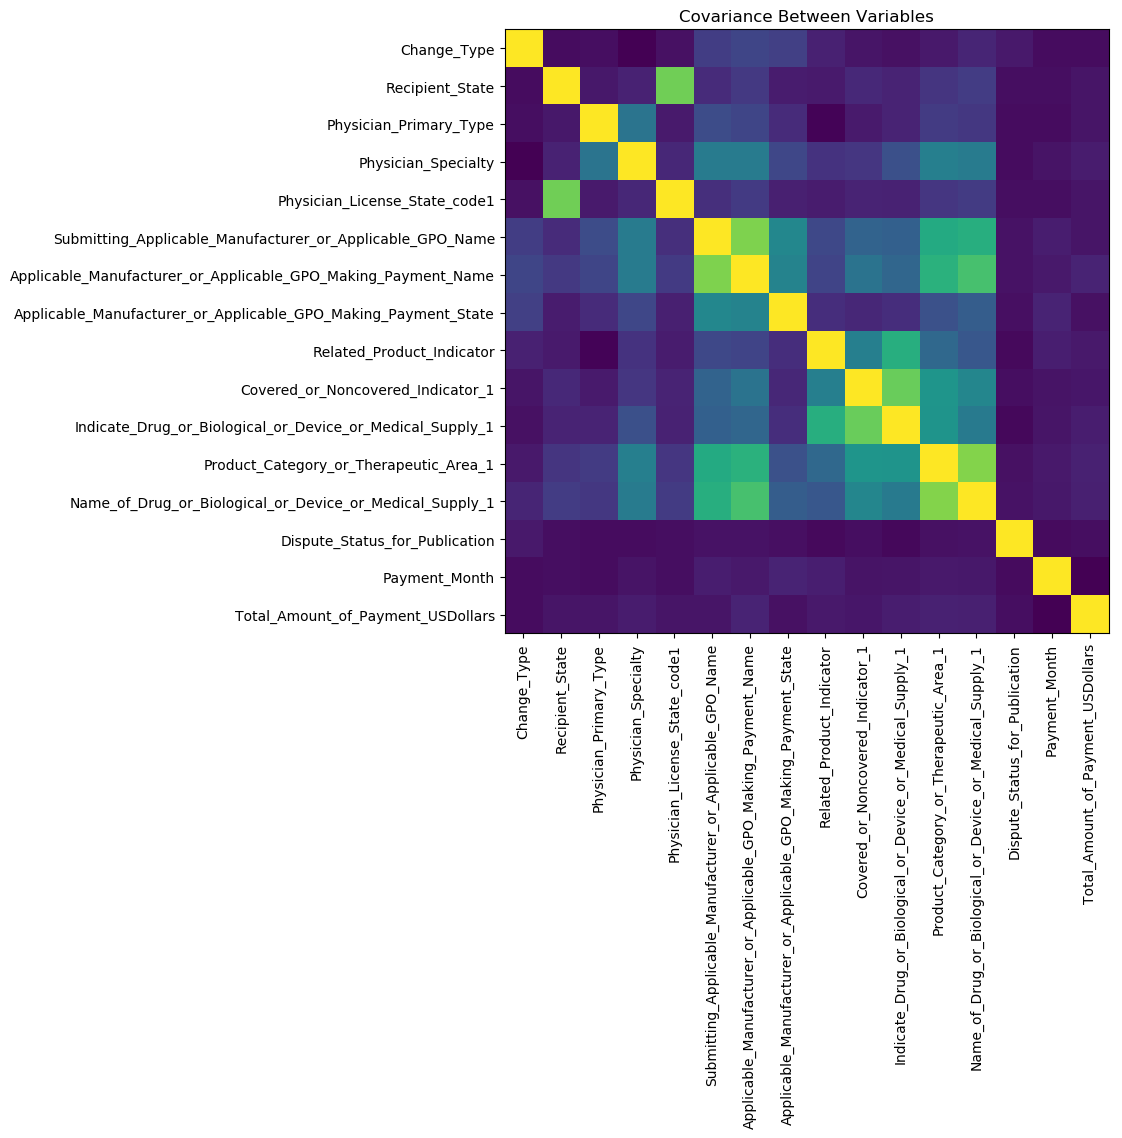

In [110]:
from sklearn.preprocessing import StandardScaler
from category_encoders.target_encoder import *
#Checking the Correlation of other variables

#Creating a ColumnTransformer
preprocess_nan = ColumnTransformer( 
    [('func', FunctionTransformer(func=null_categories_q3, validate=False), cat_features),
    ('scaler', StandardScaler(), cont_features)], remainder='passthrough')

#Transforming through the pipeline
pipeline_q3 = make_pipeline(preprocess_nan, TargetEncoder(impute_missing=False))
pipeline_q3.fit_transform(X, y.values)

#Scaling the Target Encoded Variables
from sklearn.preprocessing import scale
X_transformed = pipeline_q3.fit_transform(X, y.values)
X_scaled = scale(X_transformed)
cov = np.cov(X_scaled, rowvar=False)

#Plotting the Covariance Plot
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(cov)
plt.xticks(range(X.shape[1]), cat_features+cont_features, rotation=90)
plt.yticks(range(X.shape[1]), cat_features+cont_features)
plt.title('Covariance Between Variables');

As we can see from above, there are some evident correlations:

- 'Physician_License_State_code1' is highly correlated with 'Recipient_State'
- 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name' is highly correlated with 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'
- 'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1' is highly correlated with 'Product_Category_or_Therapeutic_Area_1'

To tackle this, we will remove the correlated feature that has less number of null values. In case of a tie, we will remove the features that has more unique values to better generalize the data.

In [111]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19888 entries, 0 to 19887
Data columns (total 16 columns):
Change_Type                                                       19888 non-null object
Recipient_State                                                   19862 non-null object
Physician_Primary_Type                                            19770 non-null object
Physician_Specialty                                               19743 non-null object
Physician_License_State_code1                                     19770 non-null object
Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name         19888 non-null object
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name     19888 non-null object
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State    18867 non-null object
Related_Product_Indicator                                         19888 non-null object
Covered_or_Noncovered_Indicator_1                                 18085 non-null object
Indicate_Dr

In [112]:
X.drop(columns=['Physician_License_State_code1',
               'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name', 'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1'], inplace=True)

#Updating the Categorical Features
cat_features = list(X.columns)
cat_features.remove('Total_Amount_of_Payment_USDollars')

In [113]:
# Splitting the data in training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [114]:
#Creating a column transformer with null_categories_q3 function
preprocess_nan = ColumnTransformer( 
    [('func', FunctionTransformer(func=null_categories_q3, validate=False), cat_features),
    ('scaler', StandardScaler(), cont_features)], remainder='passthrough')

In [115]:
#Creating Pipeline to standardize continuous features and target encode categorical features
pipeline_q3 = make_pipeline(preprocess_nan, TargetEncoder(impute_missing=False))
X_te = pipeline_q3.fit_transform(X_train, y_train.values)

#Running a 5-fold cross validation on the baseline model - Logistic Regression. Note that all the 20 features are used in implementation
logreg_scores = cross_val_score(LogisticRegression(), X_te, y_train, cv=5)
print('Logistic Regression - Accuracy (Target Based): ', np.mean(logreg_scores))

Logistic Regression - Accuracy (Target Based):  0.8913911803460562


In [116]:
#Calculating the precision and recall
precision_q3 =  cross_val_score(LogisticRegression(), X_te, y_train, cv=5, scoring='precision')
recall_q3 = cross_val_score(LogisticRegression(), X_te, y_train, cv=5, scoring='recall')
print('Logistic Regression - Precision (Target Based): ', np.mean(precision_q3))
print('Logistic Regression - Recall (Target Based): ', np.mean(recall_q3))

Logistic Regression - Precision (Target Based):  0.897625720911762
Logistic Regression - Recall (Target Based):  0.8831265300374792


It looks like the Accuracy, Precision and Recall improve significantly. Let us now one-hot-encode the categorical features instead of target encoding and see how the results are affected.

In [117]:
#Creating Column Transformer for one-hot-encoding
preprocess_nan = ColumnTransformer( 
    [('func', FunctionTransformer(func=null_categories_q3, validate=False), cat_features),
    ('scaler', StandardScaler(), cont_features)], remainder='passthrough')

preprocess_baseline_ohe = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown='ignore'), 
                                            np.arange(0,len(X_train.columns)-1))], remainder='passthrough')

In [118]:
#Creating pipeline for one-hot-encoding
pipeline_q3_1 = make_pipeline(preprocess_nan, preprocess_baseline_ohe, LogisticRegression())
logreg_scores = cross_val_score(pipeline_q3_1, X_train, y_train, cv=5)
print('Logistic Regression - Accuracy (OHE): ', np.mean(logreg_scores))

Logistic Regression - Accuracy (OHE):  0.9027888331059764


In [119]:
#Calculating the precision and recall
precision_q3_1 =  cross_val_score(pipeline_q3_1, X_train, y_train, cv=5, scoring='precision')
recall_q3_1 = cross_val_score(pipeline_q3_1, X_train, y_train, cv=5, scoring='recall')
print('Logistic Regression - Precision (OHE): ', np.mean(precision_q3_1))
print('Logistic Regression - Recall (OHE): ', np.mean(recall_q3_1))

Logistic Regression - Precision (OHE):  0.9145777401938282
Logistic Regression - Recall (OHE):  0.8882320710298461


It apprears that there isn't much difference in the way features are encoded. Both Target Based Encoding and One Hot Encoding give almost the same results. However, since there are a lot of categories, we will go ahead with using target encoding in the following.

# Task 4

In this section, we will implement two classification models - Random Forest and Gradient Boosting. The preprocessing and feature engineering will be done as per the requirement of the model.

The dataset that would be used is the X_train and y_train that was created after we removed the features in the above tasks.

The following preprocessing and feature engineering steps would be done for both RandomForest and GradientBoosting. The steps are same as both of them are ensemble tree based models:

- Create a new category for the null values.
- Target encode the categorical variables.
- We will not scale the data as both are tree based model and scaling can be computationally expensive.

In [120]:
#Defining a function to replace the null values with NA
def null_categories_q4(Xa):
    return Xa.replace({np.nan:'NA'})

#Creating a column transformer with null_categories_q3 function
preprocess_nan_q4 = ColumnTransformer( 
    [('func', FunctionTransformer(func=null_categories_q4, validate=False), cat_features)], remainder='passthrough')

First, we will implement the **Random Forest Classifier**. The parameters that we would be tuning are - n_estimators and max_depth over 3 values each.


In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

scoring = {'auc': 'roc_auc', 'accuracy':'accuracy', 'average_precision': 'average_precision', 
           'precision':'precision', 'recall':'recall'}

#Creating Pipeline for Random Forest
pipeline_rf = Pipeline(steps=[('nan',preprocess_nan_q4), ('te', TargetEncoder()), 
                            ('rf', RandomForestClassifier())])

#Defining the parameters over which grid-search would run: Note only two parameters are being tuned as running
#the model is computationally expensive - it makes the kernel crash on our machines.

parameters = {'rf__n_estimators':[100, 500, 1000], 'rf__max_depth':[None, 3, 7]}

#Running Grid Search
gcv_rf = GridSearchCV(pipeline_rf, param_grid= parameters, cv=3, scoring=scoring,  refit='auc', return_train_score=True)
gcv_rf.fit(X_train, y_train.values)

print("RF best parameters: {}".format(gcv_rf.best_params_))

RF best parameters: {'rf__max_depth': None, 'rf__n_estimators': 500}


In [122]:
print("accuracy RF: {}".format(np.mean(gcv_rf.cv_results_['mean_test_accuracy'])))
print("average_precision RF: {}".format(np.mean(gcv_rf.cv_results_['mean_test_average_precision'])))
print("precision RF: {}".format(np.mean(gcv_rf.cv_results_['mean_test_precision'])))
print("recall RF: {}".format(np.mean(gcv_rf.cv_results_['mean_test_recall'])))

accuracy RF: 0.9403921218080511
average_precision RF: 0.979491694038916
precision RF: 0.9270312094666393
recall RF: 0.9559226800726699


Now, we will implement a **Gradient Boosting Classifier**. We would be tuning learning rate over 3 values (note that fewer hypterparameters are tuned due to computational limitations.

In [123]:
from sklearn.ensemble import GradientBoostingClassifier

#Creating Pipeline for Gradient Boosting
pipeline_gb = Pipeline(steps=[('nan',preprocess_nan_q4), ('te', TargetEncoder()), 
                            ('gb', GradientBoostingClassifier())])

#Defining the parameters over which grid-search would run
parameters = {'gb__learning_rate':[.2, .1, .05]}

#Running Grid Search
gcv_gb = GridSearchCV(pipeline_gb, param_grid= parameters, cv=3, scoring=scoring, refit='auc', return_train_score=True)
gcv_gb.fit(X_train, y_train.values)

print("GB best parameters: {}".format(gcv_gb.best_params_))

GB best parameters: {'gb__learning_rate': 0.2}


In [124]:
print("accuracy GB: {}".format(np.mean(gcv_gb.cv_results_['mean_test_accuracy'])))
print("average_precision GB: {}".format(np.mean(gcv_gb.cv_results_['mean_test_average_precision'])))
print("precision GB: {}".format(np.mean(gcv_gb.cv_results_['mean_test_precision'])))
print("recall GB: {}".format(np.mean(gcv_gb.cv_results_['mean_test_recall'])))

accuracy GB: 0.9434835076427998
average_precision GB: 0.9824335714538619
precision GB: 0.9321416412784284
recall GB: 0.9563851645505409


As we can see from the above results, both Random Forest and Gradient Boosting perform equally well. Note that the results that we get in this part are higher than what we got in Task 2 (Baseline) and improved Task 3 (Improved Baseline).

# Task 5

In this section, we will identify features that are important to our best model. Since there is not much difference between Gradient Boosting and Random Forest as per Task 4, we will go ahead and choose Gradient Boosting to be the model that we will use in this task with the best parameter - learning_rate = 0.2

We will also study which features are most influential, and which features could be removed without decrease in performance.

In [125]:
preprocess_nan_q5 = ColumnTransformer( 
    [('func', FunctionTransformer(func=null_categories_q4, validate=False), cat_features)], remainder='passthrough')

First, we will plot the **Partial Dependence Curves** to see the dependence of each of the variable on the label individually.

<Figure size 7200x7200 with 0 Axes>

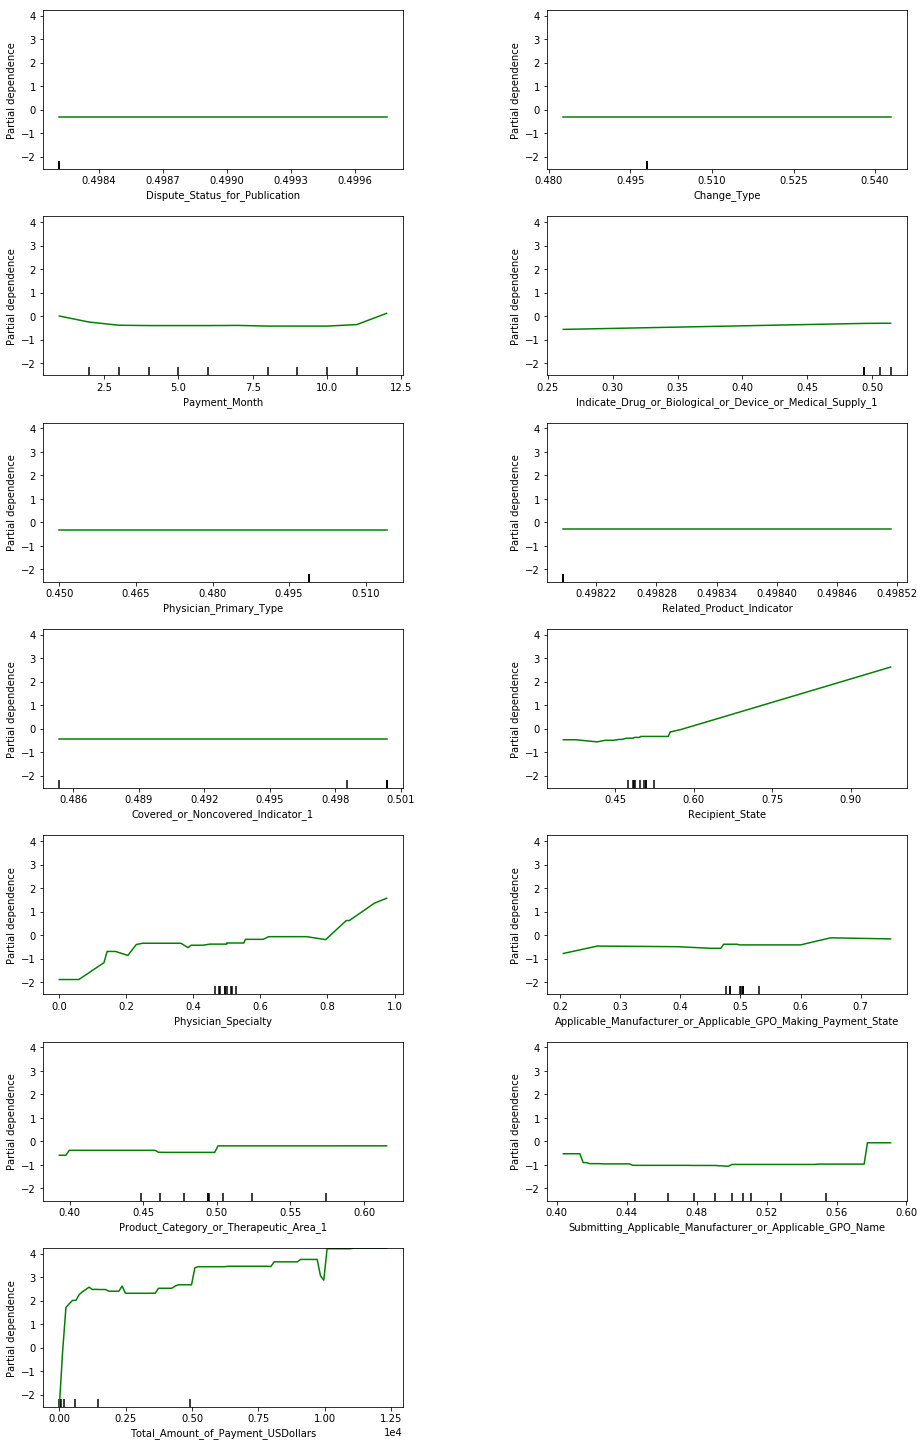

In [155]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
x = preprocess_nan_q5.fit_transform(X_train)

_ = plt.figure(figsize=(100,100))

fig, axs = plot_partial_dependence(
    gcv_gb.best_estimator_.named_steps['gb'], TargetEncoder().fit_transform(x, y_train), 
    np.argsort(gcv_gb.best_estimator_.named_steps['gb'].feature_importances_)[-14:],n_cols=2,
    feature_names=cat_features+cont_features, n_jobs=-1)

plt.subplots_adjust(top=5, left=0, right=2)

The curves for 'Dispute_Status_for_Publication', 'Change_Type', 'Physician_Primary_Type', 'Related_Product_Indicator' and 'Covered_or_Noncovered_Indicator_1' are almost flat. This suggests that these features do not individually impact the target.

Now let us use **Recursive Feature Elimination**. This iterative model-based selection would help us drop features in a recursive fashion while takin into account impact of other features.

In [160]:
from sklearn.feature_selection import RFE

# create ranking among all features by selecting only one
rfe = RFE(gcv_gb.best_estimator_.named_steps['gb'], n_features_to_select=1)
rfe.fit(TargetEncoder().fit_transform(x, y_train), y_train)
rfe.ranking_

array([ 9, 12,  7,  8,  2,  3, 10,  4,  5,  6, 13, 11,  1])

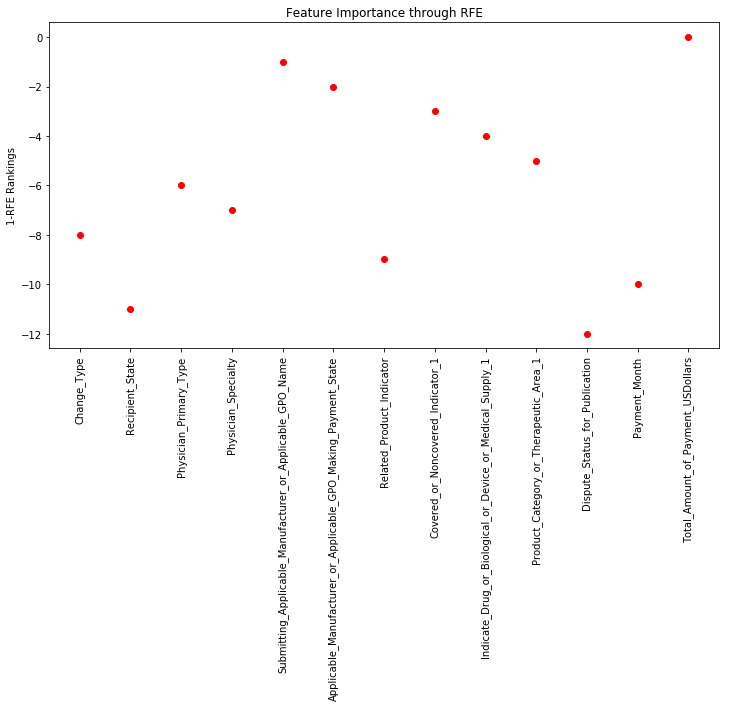

In [173]:
#Plotting the importance of features obtained in RFE
fig = plt.figure(figsize=(12,6))
_ = plt.plot(1-rfe.ranking_, 'o', c='r')
_ = plt.ylabel("1-RFE Rankings")
_ = plt.xticks(range(X.shape[1]), cat_features+cont_features, rotation=90)
_ = plt.title('Feature Importance through RFE')

The results obtained in Partial Dependence Curve and Recursive Feature Elimination are slightly different. This might be due to the fact that Partial Dependence Curve ignore all the other features while reporting the importance whereas RFE adopts a iterative approach which takes into account the effect of other features.

Next, we will employ **Recursive Feature Elimination Cross Validation (RFECV)** that allows you to us efficient grid search for the number of features to keep. 

In [189]:
#Performing Recursive Feature Elimination Cross Validation
from sklearn.feature_selection import RFECV

X_train_transformed = TargetEncoder().fit_transform(x, y_train)

#Running RFECV to get the best parameters
rfe = RFECV(gcv_gb.best_estimator_.named_steps['gb'], cv=5)
rfe.fit(X_train_transformed, y_train)
print(rfe.support_)
print(list(np.array(cat_features+cont_features)[rfe.support_]))

[ True False  True  True  True  True  True  True  True  True False  True
  True]
['Change_Type', 'Physician_Primary_Type', 'Physician_Specialty', 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State', 'Related_Product_Indicator', 'Covered_or_Noncovered_Indicator_1', 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1', 'Product_Category_or_Therapeutic_Area_1', 'Payment_Month', 'Total_Amount_of_Payment_USDollars']


As per RFECV, the above features are useful for the prediction. Now, we will build a model based on these features to see if the model performance improves.

In [192]:
#Building Gradient Boosting Model based on the features selected by RFECV
from sklearn.model_selection import cross_validate

pipe_rfe_gb = make_pipeline(RFECV(gcv_gb.best_estimator_.named_steps['gb'], cv=5), gcv_gb.best_estimator_.named_steps['gb'])
pipe_rfe_gb_scores = cross_validate(pipe_rfe_gb, X_train_transformed, y_train, cv=5, scoring=scoring)

In [195]:
#Calculating the results
print("accuracy GB-RFECV: {}".format(np.mean(pipe_rfe_gb_scores['test_accuracy'])))
print("average_precision GB-RFECV: {}".format(np.mean(pipe_rfe_gb_scores['test_average_precision'])))
print("precision GB-RFECV: {}".format(np.mean(pipe_rfe_gb_scores['test_precision'])))
print("recall GB-RFECV: {}".format(np.mean(pipe_rfe_gb_scores['test_recall'])))
print("auc GB-RFECV: {}".format(np.mean(pipe_rfe_gb_scores['test_auc'])))

accuracy GB-RFECV: 0.9410030811328248
average_precision GB-RFECV: 0.9806453397544246
precision GB-RFECV: 0.927698306795922
recall GB-RFECV: 0.9563411252410148
auc GB-RFECV: 0.9833411665443841


As we can see from the above, there is not much difference from the Gradient Boosting Model that was created in Task 4. This is probably due to the fact that the performance of the model in Task 4 was already very good. Hence, there might be a cieling effect limiting how much better scores we can obtain.

# Task 6

In this task, we will create an 'explainable' model that will try to achieve the same performance results as our best model - Gradient Boosting built in the previous sections.

For this task, we will develop a simple tree. We will perform grid search to tune our parameters, use feature selection to reduce the number of features and also perform preprocessing suitable for Decision Tree. Since this model will be an explainable one, it will have small number of leaves/less depth.

We will focus on explaining the model globally i.e. we will identify the features that are important to the model.

In [238]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
pipeline_tree = Pipeline(steps=[('nan',preprocess_nan_q4), ('te', TargetEncoder()), ('tree', DecisionTreeClassifier())])

#Defining the parameters over which grid-search would run: Note only two parameters are being tuned as running
#the model is computationally expensive - it makes the kernel crash on our machines.

parameters = {'tree__max_depth': [None, 4, 10]}

#Running Grid Search
gcv_tree = GridSearchCV(pipeline_tree, param_grid= parameters, cv=3, scoring=scoring,  refit='auc', return_train_score=True)
gcv_tree.fit(X_train, y_train.values)

print("Tree best parameters: {}".format(gcv_tree.best_params_))

Tree best parameters: {'tree__max_depth': 4}


In [360]:
print("accuracy tree: {}".format(np.mean(gcv_tree.cv_results_['mean_test_accuracy'])))
print("average_precision tree: {}".format(np.mean(gcv_tree.cv_results_['mean_test_average_precision'])))
print("precision tree: {}".format(np.mean(gcv_tree.cv_results_['mean_test_precision'])))
print("recall tree: {}".format(np.mean(gcv_tree.cv_results_['mean_test_recall'])))
print("auc tree: {}".format(np.mean(gcv_tree.cv_results_['mean_test_auc'])))

accuracy tree: 0.9332037186019487
average_precision tree: 0.9214610912652677
precision tree: 0.9245028487325908
recall tree: 0.9433996366227194
auc tree: 0.9468890628021424


Note from the above that the performance of a single decision tree is nearly as good as best Gradient Boosting Model. 

Now let us visulize the decision tree with the best parameters.

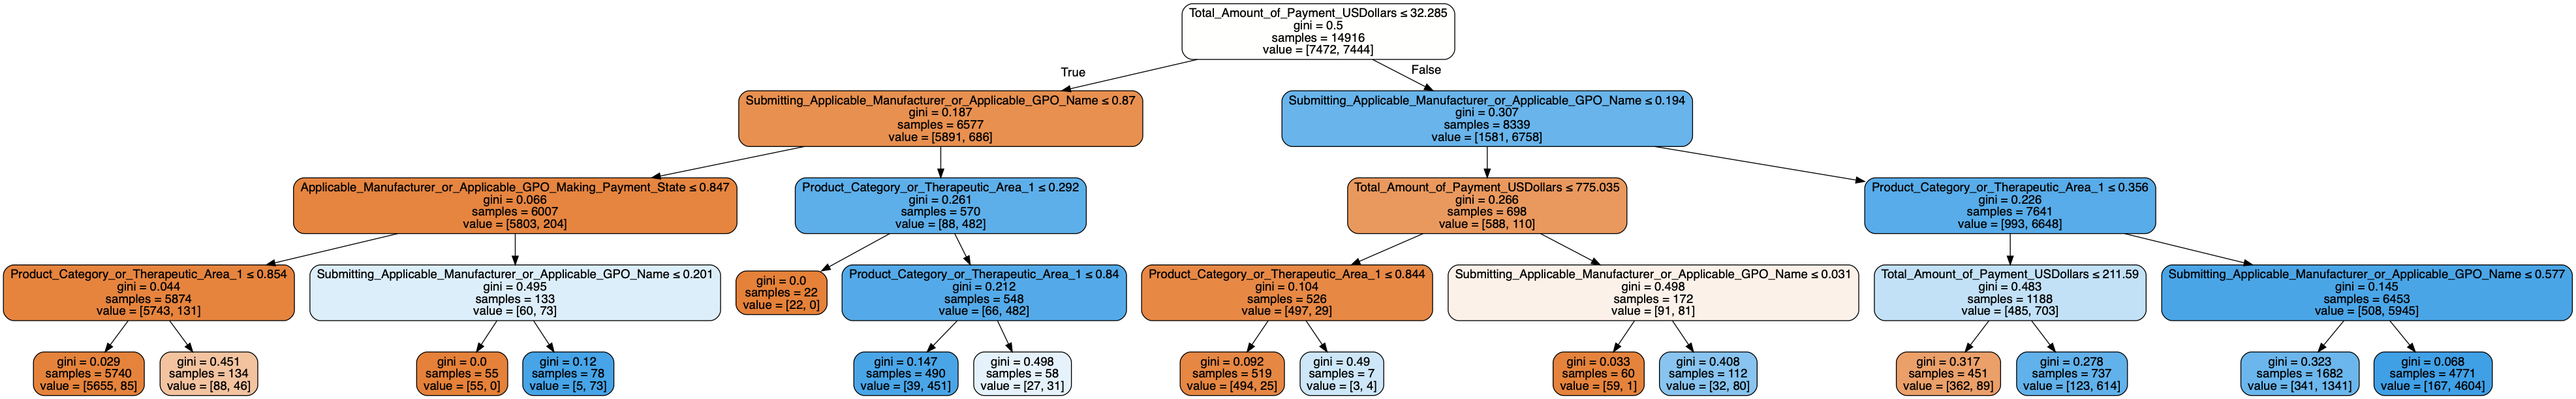

In [275]:
#Visualizing the Decision Tree: 
#source: https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot
import graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(gcv_tree.best_estimator_.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=(cat_features+cont_features))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(),width=2000, height=2000)

As we can see from the above tree, the model is very explainable. We can see that the tree is split on different features alongside the Gini coefficient allowing us to see which coefficient leads to maximum reduction in the Gini coefficient.

PS: Please ignore the small size of the chart due to large feature names, affecting the aspect ratio

Now, let us plot the Feature Importances

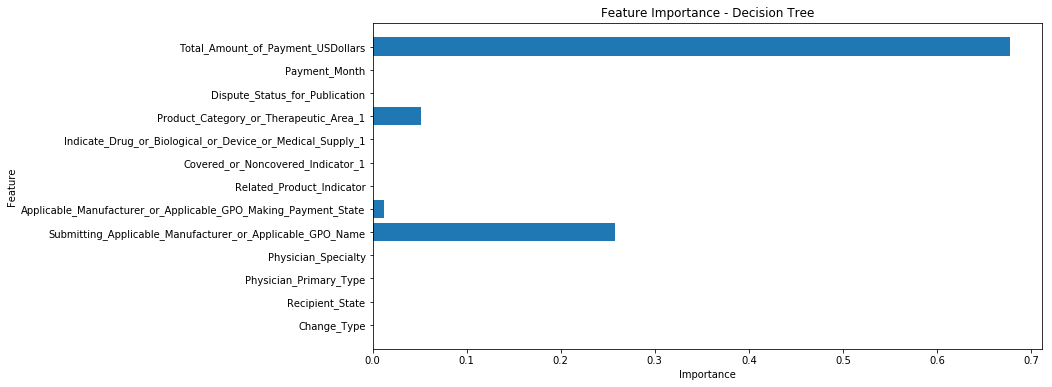

In [292]:
#Plotting Feature Importances.
_ = plt.figure(figsize=(12,6))
_ = plt.barh(range(13), gcv_tree.best_estimator_.named_steps['tree'].feature_importances_)
_ = plt.yticks(range(13), (cat_features+cont_features))
_ = plt.title('Feature Importance - Decision Tree')
_ = plt.xlabel('Importance')
_ = plt.ylabel('Feature')

Now we will build even a simpler model, where we will take only the 4 features as per the above chart that are important. We will eliminate all the other features:

- 'Total_Amount_of_Payment_USDollars'
- 'Product_Category_or_Therapeutic_Area_1'
- 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State
- 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'

In [370]:
#Creating reduce training set

X_train_reduced = X_train[['Total_Amount_of_Payment_USDollars', 'Product_Category_or_Therapeutic_Area_1',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State', 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name']]

X_train_reduced.reset_index(inplace=True)
X_train_reduced.drop(columns='index', inplace=True)

In [372]:
preprocess_nan_q6 = ColumnTransformer( 
    [('func', FunctionTransformer(func=null_categories_q4, validate=False), X_train_reduced.columns)], remainder='passthrough')

pipeline_tree_update = Pipeline(steps=[('nan',preprocess_nan_q6), ('te', TargetEncoder()), ('tree', DecisionTreeClassifier())])

#Defining the parameters over which grid-search would run: Note only two parameters are being tuned as running
#the model is computationally expensive - it makes the kernel crash on our machines.

parameters = {'tree__max_depth': [2, 3, 4]}

# # #Running Grid Search
gcv_tree_updated = GridSearchCV(pipeline_tree_update, param_grid= parameters, cv=3, scoring=scoring,  refit='auc', return_train_score=True)
gcv_tree_updated.fit(X_train_reduced, y_train.values)

print("Tree best parameters: {}".format(gcv_tree_updated.best_params_))

Tree best parameters: {'tree__max_depth': 4}


In [373]:
print("accuracy tree (4 features): {}".format(np.mean(gcv_tree_updated.cv_results_['mean_test_accuracy'])))
print("average_precision tree (4 features): {}".format(np.mean(gcv_tree_updated.cv_results_['mean_test_average_precision'])))
print("precision tree (4 features): {}".format(np.mean(gcv_tree_updated.cv_results_['mean_test_precision'])))
print("recall tree (4 features): {}".format(np.mean(gcv_tree_updated.cv_results_['mean_test_recall'])))
print("auc tree (4 features): {}".format(np.mean(gcv_tree_updated.cv_results_['mean_test_auc'])))

accuracy tree (4 features): 0.9092026459283097
average_precision tree (4 features): 0.8957664351150787
precision tree (4 features): 0.8779306427984803
recall tree (4 features): 0.9515940559075123
auc tree (4 features): 0.9352025444704372


As we can see from the above, using only the 4 features does not decrease the performance to a huge extent. But at the same time we get a very good explainable model.

Let us now visualize this updated decision tree.

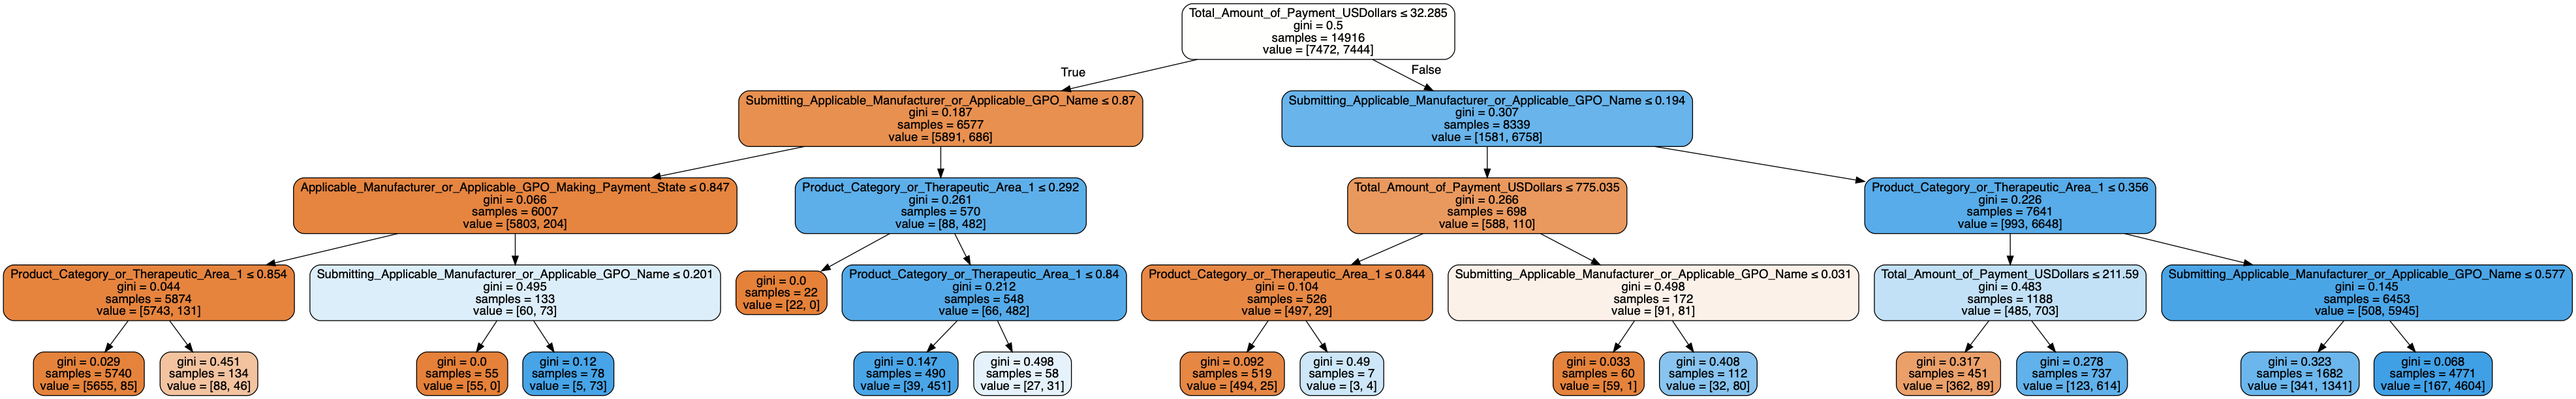

In [383]:
#Visualizing the Decision Tree: 
#source: https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

dot_data = StringIO()
export_graphviz(gcv_tree_updated.best_estimator_.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train_reduced.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(),width=2000, height=2000)